# RecSysUnab: Sistema de recomendación de ejercicios de programación basado en un modelo de dos torres

## 1. COMPRENCIÓN DEL PROBLEMA

En la Universidad Andrés Bello, existe una asignatura llamada "Introducción a la Programación", que forma parte del plan de estudios de carreras relacionadas con ingeniería, tecnología, computación, robótica e informática. Esta asignatura se cursa al inicio de dichas carreras con el objetivo de que los estudiantes adquieran conceptos básicos de programación y desarrollen la capacidad de interpretar nociones fundamentales en el área. Para ello, se establece una serie de evaluaciones a lo largo del semestre, donde los estudiantes deben demostrar los conocimientos adquiridos. Adicionalmente, la universidad pone a disposición una serie de recursos educativos, como ejercicios prácticos, para que los estudiantes puedan reforzar e internalizar los conceptos y aplicarlos en sus pruebas.

No obstante, cada estudiante que cursa esta asignatura tiene características, métodos de estudio e intereses únicos. Si bien pueden compartir similitudes en ciertos aspectos, sus necesidades de aprendizaje varían considerablemente. Además, los recursos disponibles en la página web de la universidad incluyen ejercicios con distintos niveles de dificultad y temáticas variadas, los cuales pueden ser útiles para algunos estudiantes, pero no necesariamente para todos. Esta falta de personalización puede dificultar el aprendizaje efectivo.

La problemática surge cuando ciertos estudiantes obtienen bajas calificaciones o reprueban la asignatura. Al ser "Introducción a la Programación" la primera asignatura de este tipo en varias carreras, su impacto en el desempeño futuro de los estudiantes puede ser significativo. Esto podría generar deficiencias en conocimientos esenciales, afectando su desempeño académico a largo plazo.

Estas dificultades suelen ser causadas por diversos factores, siendo uno de los principales la falta de comprensión de los conceptos fundamentales o la ineficaz orientación del aprendizaje hacia las necesidades individuales de cada estudiante. La ausencia de un enfoque personalizado que considere los niveles de aprendizaje, conocimiento y progreso individual puede derivar en métodos de estudio poco efectivos, un bajo dominio de los contenidos y, en consecuencia, malas calificaciones o el eventual fracaso en la asignatura.

Por ello, este proyecto tiene como objetivo desarrollar e implementar un sistema de recomendación de ejercicios de programación basado en un modelo de dos torres. Este sistema está diseñado para estudiantes universitarios que cursan la asignatura de "Introducción a la Programación" en la Universidad Andrés Bello. Su propósito es establecer un método de aprendizaje personalizado, adaptado al nivel de habilidad, las preferencias individuales y los objetivos de aprendizaje de cada estudiante, con el fin de mejorar su comprensión de la materia y maximizar su rendimiento académico.

## 2. COMPRENCIÓN DE LOS DATOS

### MÓDULOS


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## directorio donde estan los datos originales entregados por la universidad. 
VAR_DIR_DATA_ORIGINAL = './data/original'

## df_catalogo es un dataset que contiene los ejercicios de programación que estaban disponibles para ser realizados dentro de la pagina web.
df_catalogo = pd.read_csv(f"{VAR_DIR_DATA_ORIGINAL}/catalogo.csv", sep=";", encoding="latin1")

## el dataset 'ejercicios_edx.xlsx' es una extension del dataset catalogo, ya que contiene un descripcion más amplia en cuestion de puntaje y descripcion del ejercicio. 
hito1 = pd.read_excel(f"{VAR_DIR_DATA_ORIGINAL}/ejercicios_edx.xlsx", sheet_name='Hito1')
hito2 = pd.read_excel(f"{VAR_DIR_DATA_ORIGINAL}/ejercicios_edx.xlsx", sheet_name='Hito2')
hito3 = pd.read_excel(f"{VAR_DIR_DATA_ORIGINAL}/ejercicios_edx.xlsx", sheet_name='Hito3')
hito4 = pd.read_excel(f"{VAR_DIR_DATA_ORIGINAL}/ejercicios_edx.xlsx", sheet_name='Hito4')
# clasificaciones = pd.read_excel(f"{VAR_DIR_DATA_ORIGINAL}/ejercicios_edx.xlsx", sheet_name='clasificacion')
df_unido = pd.concat([hito1, hito2, hito3, hito4], ignore_index=True)
df_unido.columns = ['codigo', 'puntos','nombre', 'enunciado', 'Abstracción', 'Descomposición', 'Patrones', 'Algoritmo']

## dataset final para el conjuntos de ejercicios en el catalogo
df_catalogo = pd.merge(df_catalogo, df_unido, on='nombre', how='inner')

## df_data_a es un dataset almacena rgistros generales de los estudiantes durante un cierto periodo de tiempo, supuestamente con este dataset durante un semestre en la universidad, con datos del curso en general. 
df_data_a = pd.read_csv(f"{VAR_DIR_DATA_ORIGINAL}/dataset_a.csv", sep=";", encoding="latin1")

## df_data_ax es el mismo dataset almacena los registros generales como el df_data_a pero en formato de libro de excel. 
df_data_ax = pd.read_excel(f"{VAR_DIR_DATA_ORIGINAL}/dataset_a.xlsx")

## df_data_a_2021 es un dataset que almacena algunos registros globales de los estudiantes durante cierto periodo de tiempo, un semestre natural de la universidad, con los cuales realizaron en la pagina web en 2021 como su nombre lo indica. 
df_data_a_2021 = pd.read_csv(f"{VAR_DIR_DATA_ORIGINAL}/dataset_a_2021.csv", sep=";", encoding="latin1")

### DIMENSIONES DE LOS DATASETS

In [3]:
from models.utils.analisis import dimensiones_dataframe

In [4]:
# CATALOGO
print(dimensiones_dataframe(df_catalogo))

# DATA_A
print(dimensiones_dataframe(df_data_a))

# DATA_A (EXCEL)
print(dimensiones_dataframe(df_data_ax))

# DATA_A_2021
print(dimensiones_dataframe(df_data_a_2021))

[+] Número de Filas: 56
[+] Número de Columnas: 22
[+] Nombres de Columnas: ['hito', 'oid', 'nombre', 's1', 's2', 's3', 's4', 'k1', 'k2', 'k3', 'k4', 'skill', 'knowledge', 'complexity', 'item', 'codigo', 'puntos', 'enunciado', 'Abstracción', 'Descomposición', 'Patrones', 'Algoritmo']

[+] Número de Filas: 467
[+] Número de Columnas: 110
[+] Nombres de Columnas: ['rut', 'usuario', 'correo', 'nombre', 'nrc', 'profesor', 'i1', 'f1', 't1', 'r1', 'p1', 's1', 'l1', 'i2', 'f2', 't2', 'r2', 'p2', 's2', 'l2', 'i3', 'f3', 't3', 'r3', 'p3', 's3', 'l3', 'i4', 'f4', 't4', 'r4', 'p4', 's4', 'l4', 'i5', 'f5', 't5', 'r5', 'p5', 's5', 'l5', 'i6', 'f6', 't6', 'r6', 'p6', 's6', 'l6', 'op1', 'op2', 'op3', 'op4', 'op5', 'op6', 'sv1', 'sv2', 'sv3', 'sv4', 'sv5', 'sv6', 'lt', 'tt', 'pt', 'game_score', 'score', 'score_a', 'score_p', 'score_d', 'score_s', 'tema2', 'tema3', 'tema4', 'tema5', 'tema6', 'tema7', 'tema8', 'tema9', 'hito1', 'hito2', 'hito3', 'hito4', 'seq1', 'seq2', 'seq3', 'seq4', 'c1', 'c2', 'c3',

### INFORMACIÓN DE LOS DATASETS

In [5]:
# VISUALIZACION: CATALOGO
df_catalogo.head()

,hito,oid,nombre,s1,s2,s3,s4,k1,k2,k3,...,knowledge,complexity,item,codigo,puntos,enunciado,Abstracción,Descomposición,Patrones,Algoritmo
0,1,0973dae0e1b74ab8baa8d94339ee3ae6,Cálculo del dígito verificador del rut,0,0,0,1,0,1,1,...,7,23,bh,hito1_ej5,2,Escribe un programa que reciba como dato un nú...,NaN,NaN,NaN,NaN
1,2,16f619db31204ded9418136c4587ddd8,Calculadora Geométrica,0,0,0,1,0,0,0,...,1,17,bb,tema2_ej1,2,Construye un programa que permita calcular el ...,NaN,NaN,NaN,NaN
2,2,17022c9ceac94ec5b2e7bc934c7b2d6f,Subsecuencias de ADN,0,0,1,1,0,1,1,...,7,55,dh,hito2_ej3,5,Escribe un programa que reciba como entrada un...,NaN,NaN,NaN,NaN
3,1,171b5e86d4fb47268f2692587fbec073,Números Primos,0,0,0,0,0,0,1,...,3,3,ad,tema2_p1,2,Escribe una función llamada es_primo que retor...,NaN,NaN,NaN,NaN
4,1,2437df93d3f44a87b00834072aeb1ab0,Nota Final,0,0,0,0,0,0,0,...,1,1,ab,hito1_ej1,1,Realiza un programa para preguntar al usuario ...,NaN,NaN,NaN,NaN


In [6]:
# VISUALIZACION: DATA_A
df_data_a.head()

,rut,usuario,correo,nombre,nrc,profesor,i1,f1,t1,r1,...,sol2,sol3,sol4,tarea1,tarea2,controles,np,examen,final,estado
0,5,*,*,*,17346,*,275.250242,447.083690,171.833448,3,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,R
1,7,*,*,*,17350,*,41.373362,103.258250,61.884888,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,R
2,16,*,*,*,17345,*,570.704977,707.026370,136.321393,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,R
3,44,*,*,*,17250,*,25.280670,50.940106,25.659436,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,R
4,103,*,*,*,18556,*,85.444223,223.148435,137.704212,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,R


In [7]:
# VISUALIZACION: DATA_AX
df_data_ax.head()

,rut,usuario,correo,nombre,nrc,profesor,i1,f1,t1,r1,...,sol2,sol3,sol4,tarea1,tarea2,controles,np,examen,final,estado
0,5,*,*,*,17346,*,275.250242,447.083690,171.833448,3,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,R
1,7,*,*,*,17350,*,41.373362,103.258250,61.884888,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,R
2,16,*,*,*,17345,*,570.704977,707.026370,136.321393,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,R
3,44,*,*,*,17250,*,25.280670,50.940106,25.659436,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,R
4,103,*,*,*,18556,*,85.444223,223.148435,137.704212,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,R


In [8]:
# VISUALIZACION: DATA_A_2021
df_data_a_2021.head()

,hito1,hito2,hito3,hito4,seq1,seq2,seq3,seq4,c1,c2,...,e46,e47,e48,e49,e50,e51,e52,programa,sol1,id
0,17.0,0.0,0,0,abacabadadacbhbbadad,NaN,NaN,NaN,:1:2:1:3:3:2:23:17:3:3,NaN,...,0,0,0,0,0,0,0,UNAB22115,1.0,1
1,12.0,0.0,0,0,abacabadadacbh,NaN,NaN,NaN,:1:2:1:3:3:2:23,NaN,...,0,0,0,0,0,0,0,UNAB22115,1.0,2
2,11.0,0.0,0,0,abacadadacbh,NaN,NaN,NaN,:1:2:3:3:2:23,NaN,...,0,0,0,0,0,0,0,UNAB22115,1.0,3
3,0.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,UNAB22115,1.0,4
4,0.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,UNAB22510,1.0,5


#### NOTA
Utilizando la función head() que muestra las primeras 5 filas de cada dataset, se observó lo siguiente:
+ Tanto para el dataset 'data_a' como el dataset 'data_ax', contienen los mismos datos. Por tanto se utilizará el 'data_a' para los analisis. 
+ El dataset 'data_a' existen datos ocultos por protección a la privacidad de los alumnos y profesores, por tanto, estas columnas no van a resultar de gran importancia para este proyecto. 
+ Por otro lado,  en el dataset 'data_a_2021' existen filas faltantes las cuales no llegan a concordar con la semejanza de datos del dataset 'data_a', por lo que, se puede decir que no se pudo recopilar bien la información de los alumnos. Tambien, se destaca que el este dataset tiene muchos datos faltantes. 

In [9]:
# INFORMACIÓN DE LAS VARIABLES DEL DATASET: CATALOGO
df_catalogo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hito            56 non-null     int64  
 1   oid             56 non-null     object 
 2   nombre          56 non-null     object 
 3   s1              56 non-null     int64  
 4   s2              56 non-null     int64  
 5   s3              56 non-null     int64  
 6   s4              56 non-null     int64  
 7   k1              56 non-null     int64  
 8   k2              56 non-null     int64  
 9   k3              56 non-null     int64  
 10  k4              56 non-null     int64  
 11  skill           56 non-null     int64  
 12  knowledge       56 non-null     int64  
 13  complexity      56 non-null     int64  
 14  item            56 non-null     object 
 15  codigo          56 non-null     object 
 16  puntos          56 non-null     int64  
 17  enunciado       56 non-null     objec

In [10]:
# INFORMACIÓN DE LAS VARIABLES DEL DATASET: DATA_A
df_data_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Columns: 110 entries, rut to estado
dtypes: float64(37), int64(55), object(18)
memory usage: 401.5+ KB


In [11]:
# INFORMACIÓN DE LAS VARIABLES DEL DATASET: DATA_A_2021
df_data_a_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 76 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hito1     839 non-null    float64
 1   hito2     839 non-null    float64
 2   hito3     839 non-null    int64  
 3   hito4     839 non-null    int64  
 4   seq1      667 non-null    object 
 5   seq2      11 non-null     object 
 6   seq3      0 non-null      float64
 7   seq4      0 non-null      float64
 8   c1        667 non-null    object 
 9   c2        11 non-null     object 
 10  c3        0 non-null      float64
 11  c4        0 non-null      float64
 12  p1        667 non-null    object 
 13  p2        11 non-null     object 
 14  p3        0 non-null      float64
 15  p4        0 non-null      float64
 16  nrc       839 non-null    int64  
 17  exitosos  839 non-null    int64  
 18  fallidos  839 non-null    int64  
 19  envios    839 non-null    int64  
 20  e0        839 non-null    int64 

### DATOS FALTANTES

In [12]:
from models.utils.analisis import datos_faltantes_dataframe

In [13]:
# DATOS FALTANTES: CATALOGO
datos_faltantes_dataframe(df_catalogo)

,Columna,Valores Faltantes,Porcentaje
0,Abstracción,56.0,100.0
1,Descomposición,56.0,100.0
2,Patrones,56.0,100.0
3,Algoritmo,56.0,100.0


In [14]:
# DATOS FALTANTES: DATA_A
datos_faltantes_dataframe(df_data_a)

,Columna,Valores Faltantes,Porcentaje
0,seq1,43.0,9.207709
4,c1,43.0,9.207709
8,e1,43.0,9.207709
5,c2,112.0,23.982869
9,e2,112.0,23.982869
1,seq2,112.0,23.982869
3,seq4,467.0,100.000000
2,seq3,467.0,100.000000
7,c4,467.0,100.000000
6,c3,467.0,100.000000


In [15]:
# DATOS FALTANTES: DATA_A_2021
datos_faltantes_dataframe(df_data_a_2021)

,Columna,Valores Faltantes,Porcentaje
0,seq1,172.0,20.500596
4,c1,172.0,20.500596
8,p1,172.0,20.500596
5,c2,828.0,98.688915
9,p2,828.0,98.688915
1,seq2,828.0,98.688915
3,seq4,839.0,100.000000
2,seq3,839.0,100.000000
7,c4,839.0,100.000000
6,c3,839.0,100.000000


#### NOTA

+ Al unir el dataset de ejercicios 'df_catalogo' con la información adicional extraída del dataset 'ejercicios_edx.xlsx', se observó que existen cuatro columnas que no aportan información relevante, ya que no contienen datos. Estas columnas son: 'Abstracción', 'Descomposición', 'Patrones' y 'Algoritmo'.

+ El dataset 'data_a' tiene multiples columnas con datos faltantes, la mayoria tienen que ver con los ejercicios que realizaron los estudiantes. Por tanto, se puede suponer que los estudiantes hacen mas ejercicios de los Hito 1 y 2, siendo que la mayoria de columnas del hito 3 y 4 tienen un 100% de datos faltantes. 

+ El dataset 'data_a_2021.csv' tienen el mismo problema que el anterior, se nota que existen semejanzas de atributos con mayores porcentajes de datos faltantes. 

+ Las columnas que se repiten como Seq1, Seq2, Seq3 y Seq4, representan la secuencia de ejercicios realizados en cada hito por los estudiantes, es decir, al tener Seq3 y Seq4 todas sus datos vacios en esas columnas, se puede afirmar que los estudiantes solo realizaron ejercicos del Hito 1, en su mayoria, y algunos del Hito 2.

### MÉTRICAS DE LOS DATASETS

In [16]:
# DATOS ESTADISTICOS: CATALOGO
df_catalogo.describe().T

,count,mean,std,min,25%,50%,75%,max
hito,56.0,2.214286,0.985611,1.0,1.0,2.0,3.0,4.0
s1,56.0,0.089286,0.287736,0.0,0.0,0.0,0.0,1.0
s2,56.0,0.142857,0.353094,0.0,0.0,0.0,0.0,1.0
s3,56.0,0.375000,0.488504,0.0,0.0,0.0,1.0,1.0
s4,56.0,0.303571,0.463961,0.0,0.0,0.0,1.0,1.0
k1,56.0,0.232143,0.426021,0.0,0.0,0.0,0.0,1.0
k2,56.0,0.589286,0.496416,0.0,0.0,1.0,1.0,1.0
k3,56.0,0.857143,0.353094,0.0,1.0,1.0,1.0,1.0
k4,56.0,0.910714,0.287736,0.0,1.0,1.0,1.0,1.0
skill,56.0,2.339286,2.949741,0.0,0.0,2.0,2.0,12.0


In [17]:
# DATOS ESTADISTICOS: DATA_A
df_data_a.describe().T

,count,mean,std,min,25%,50%,75%,max
rut,467.0,233.000000,134.955548,0.000000,116.500000,233.000000,349.500000,466.000000
nrc,467.0,17445.920771,298.806158,17250.000000,17330.000000,17336.000000,17341.000000,18556.000000
i1,467.0,60.730283,57.366270,0.000000,25.166123,47.284874,76.842282,570.704977
f1,467.0,161.835100,131.935606,20.879236,83.286465,128.636988,202.043098,1220.145490
t1,467.0,101.104817,110.090207,14.947463,41.700748,65.350279,116.476445,962.077675
...,...,...,...,...,...,...,...,...
tarea2,467.0,4.605782,2.338002,1.000000,2.500000,5.400000,6.900000,7.000000
controles,467.0,5.989293,1.844250,1.000000,5.900000,7.000000,7.000000,7.000000
np,467.0,5.297088,1.280340,1.000000,4.730000,5.610000,6.215000,7.000000
examen,467.0,5.394861,1.454686,1.000000,5.100000,5.700000,6.300000,7.000000


In [18]:
# DATOS ESTADISTICOS: DATA_A_2021
df_data_a_2021.describe().T

,count,mean,std,min,25%,50%,75%,max
hito1,839.0,13.353993,10.370917,0.0,3.0,13.0,20.0,42.0
hito2,839.0,0.168057,1.929950,0.0,0.0,0.0,0.0,32.0
hito3,839.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
hito4,839.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
seq3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
e50,839.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
e51,839.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
e52,839.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
sol1,839.0,3.642789,1.832625,1.0,2.2,3.7,5.1,7.0


### CORRELACIÓN DE DATOS (OPCIONAL)

In [19]:
from models.utils.analisis import correlacion_variables_dataframe

In [20]:
# CORRELACIÓN DE VARIABLES: CATALOGO
correlacion_variables_dataframe(df_catalogo, 'complexity')

complexity        1.000000
skill             0.996309
s1                0.844820
s2                0.714244
hito              0.695899
k2                0.575762
k3                0.308302
knowledge         0.299387
k4                0.247742
puntos            0.161161
s4               -0.007752
s3               -0.011272
k1               -0.047264
Abstracción            NaN
Descomposición         NaN
Patrones               NaN
Algoritmo              NaN
Name: complexity, dtype: float64

In [21]:
# CORRELACIÓN DE VARIABLES: DATA_A
correlacion_variables_dataframe(df_data_a, 'final')

final        1.000000
np           0.982339
examen       0.925550
sol4         0.831042
sol3         0.804534
tarea2       0.754213
sol2         0.699768
sol1         0.668518
controles    0.667545
tarea1       0.639589
hito1        0.600372
exitosos     0.595837
envios       0.524918
hito2        0.411878
score        0.143425
score_a      0.139381
tema2        0.133629
score_p      0.126557
videos       0.117460
r5           0.083594
Name: final, dtype: float64

In [22]:
# CORRELACIÓN DE VARIABLES: DATA_A_2021
correlacion_variables_dataframe(df_data_a_2021, 'sol1')

sol1        1.000000
id          0.995458
hito1       0.386839
exitosos    0.383443
e0          0.334326
e29         0.331309
e10         0.328143
e3          0.318727
e42         0.316038
e4          0.299403
e26         0.298051
e23         0.293238
e22         0.289299
e25         0.282818
envios      0.271860
e17         0.271349
e7          0.236058
e35         0.226412
e18         0.213371
e13         0.203075
Name: sol1, dtype: float64

#### NOTA
+  En los ejercios se puede notas que la correlación, si es que se quiere realizar con la variable 'complexity' se nota que esta influenciada directamente con la variable 'skill' e 'hito', una en mayor medida que la otra. Tomando en cuenta que las variables 'Skill' y 'Knowledge' vienen de las variables one-hot-encoded en binario de 4 bits las cuales al unirse en un numero binario de 8 bits crean el valor de la variable 'complexity'.

+ Con respecto al dataset 'data_a' si se correlacionará con alguna variable, en este caso, con la variable 'final' que representa la nota final del semestre que recibe el estudiante al final del semestre; se puede observar como las solemnes 4 y 3 estan igualmente correlacionadas con la nota final del estudiante. Sin embargo, no se puede apreciar muy bien, ya que en los registros del dataset no se encuentran algun intereses de los estudiantes en la realizacion de los ejercicios de los hitos 3 y 4. 

+ Esto pasa en mayor medida con el dataset 'data_a_2021' ya que solo se puede correlacionar la variable 'sol1' que representa el puntaje de la solemne 1 que saco el estudiante. 


### GRÁFICOS

In [23]:
# PALETA DE COLORES PARA LOS GRÁFICOS
colores = sns.color_palette("muted")

#### GRÁFICOS 'df_catalogo'

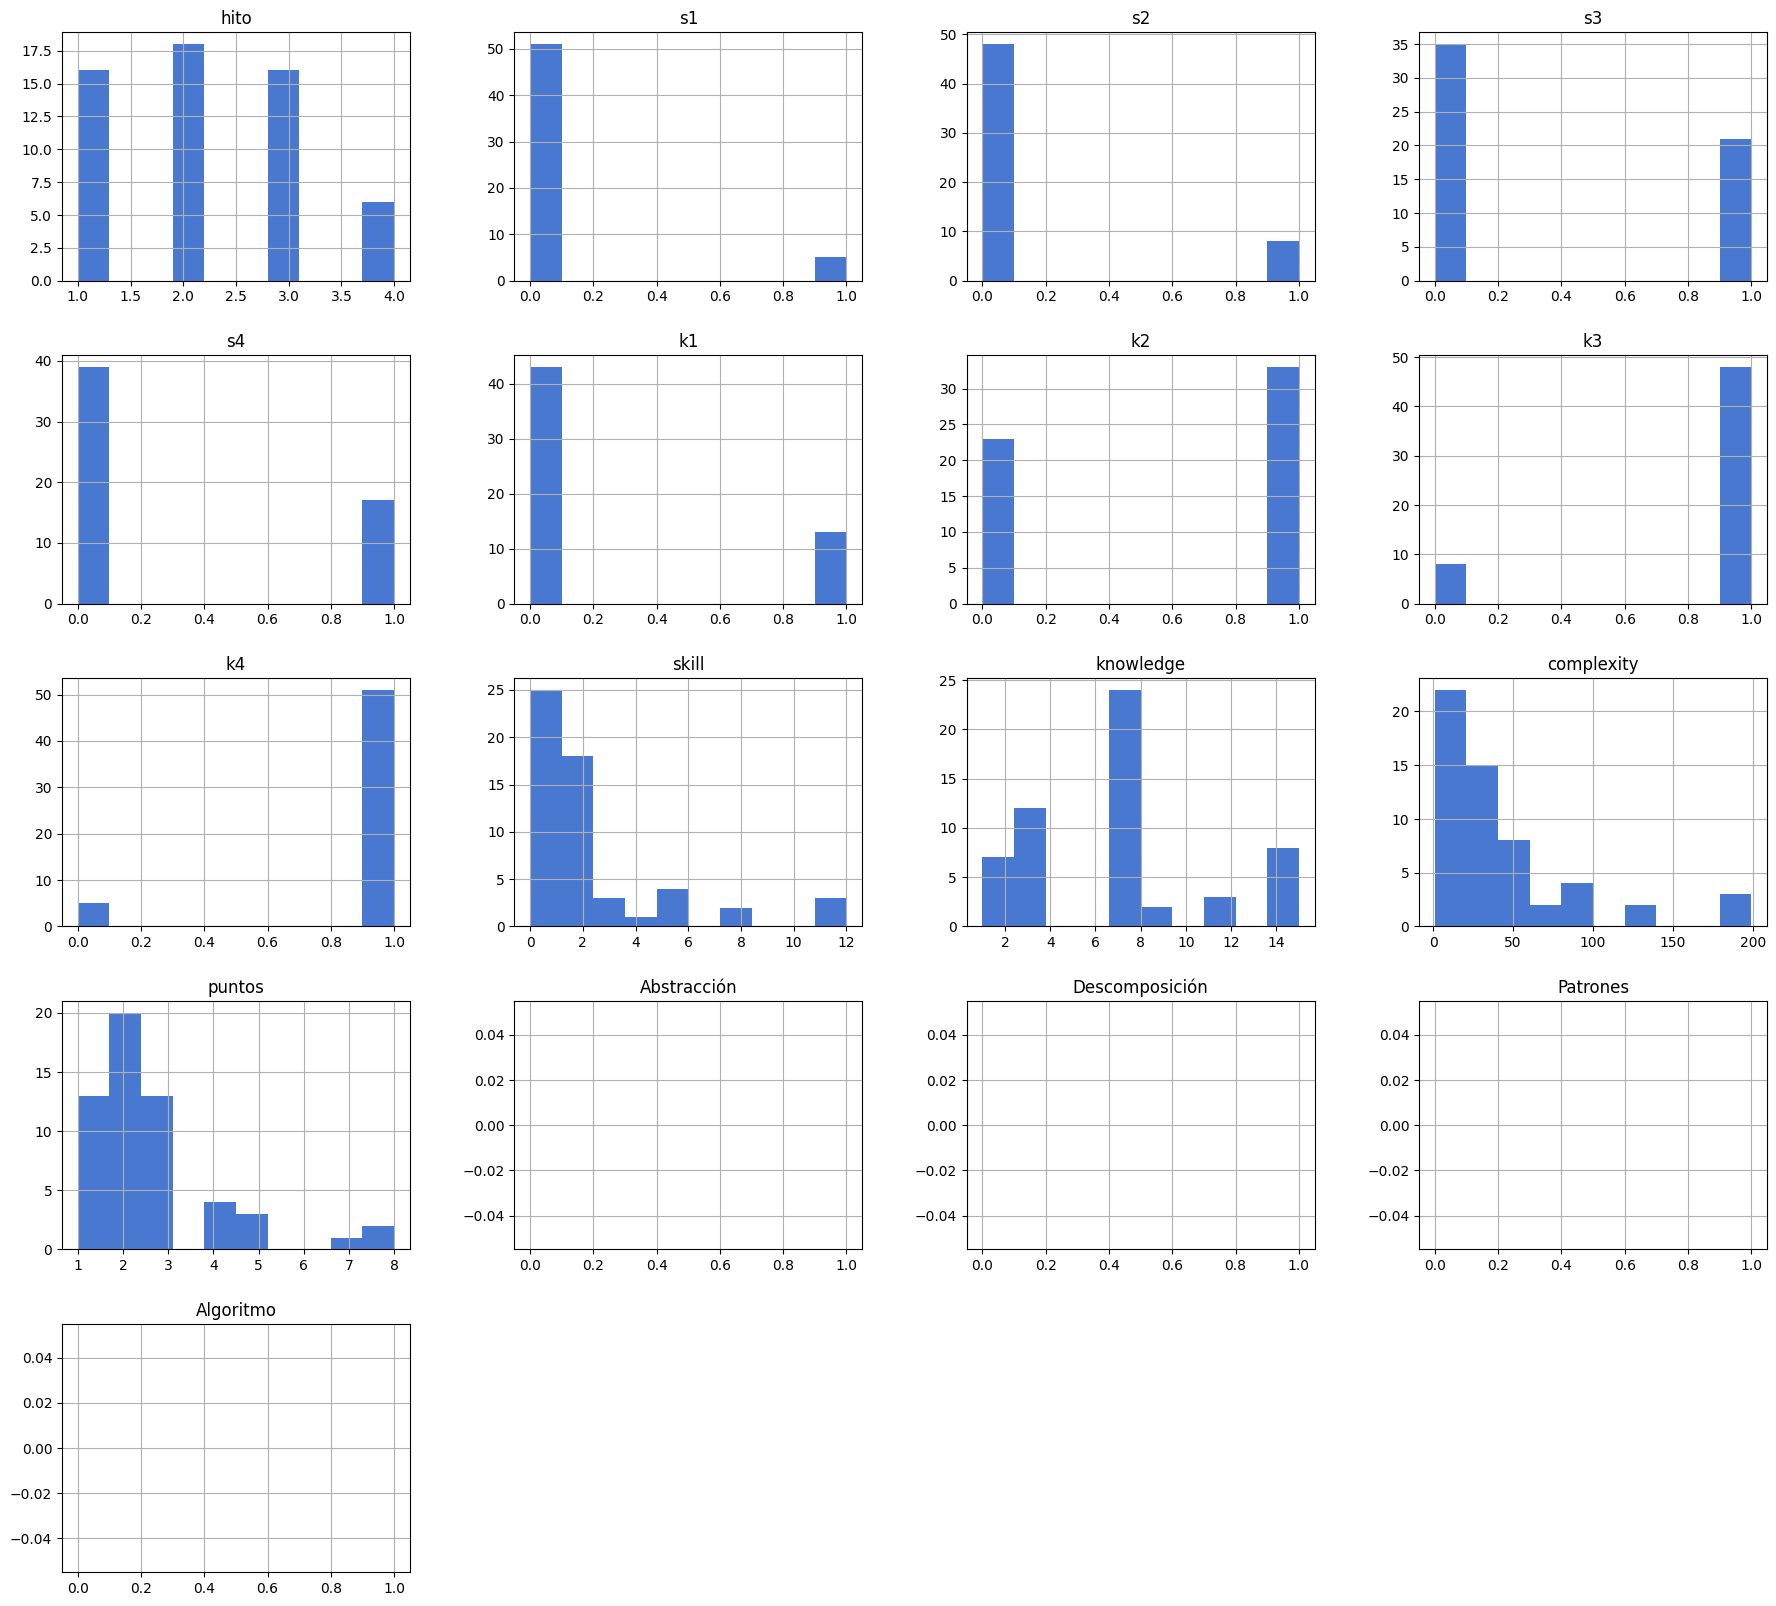

In [24]:
# DISTRIBUCIÓN DE LOS DATOS: CATALOGO  
df_catalogo.hist(figsize=(22, 20), color=colores[0])
plt.show()

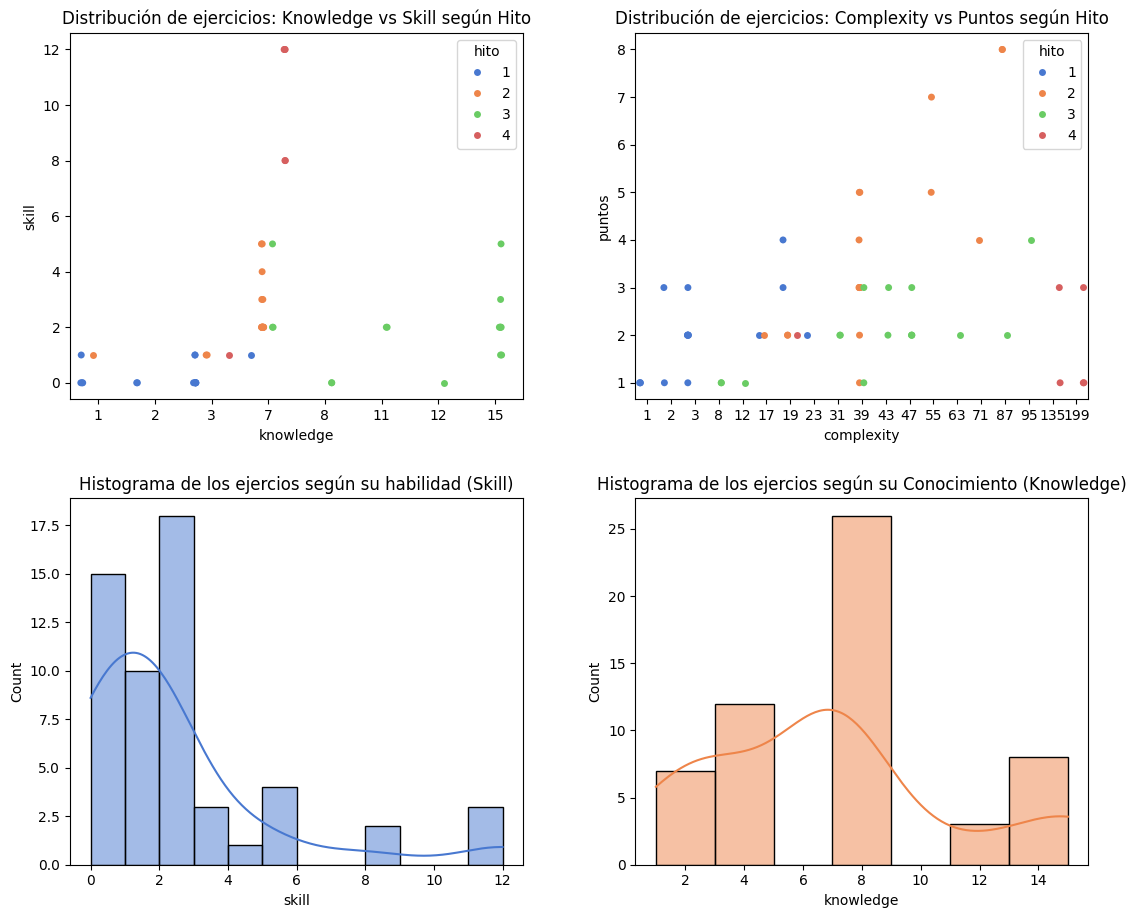

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout(pad=5.0)
palette = "muted"

# GRAFICO DE CLASIFICAÓN DE LOS EJERCICIOS => CONOCIMIENTOS VS HABILIDADES SEGÚN HITOS 
sns.stripplot(data=df_catalogo, x='knowledge', y='skill', hue='hito', palette=palette, dodge=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribución de ejercicios: Knowledge vs Skill según Hito')

# GRAFICO DE CLASIFICAÓN DE LOS EJERCICIOS => COMPLEJIDAD VS PUNTOS SEGÚN HITOS 
sns.stripplot(data=df_catalogo, x="complexity", y="puntos", hue="hito", palette=palette, dodge=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribución de ejercicios: Complexity vs Puntos según Hito')

# HISTOGRAMA DE LA HABILIDAD DE LOS EJERCICIOS
sns.histplot(data=df_catalogo, x='skill', kde=True, color=sns.color_palette(palette)[0], ax=axs[1, 0])
axs[1, 0].set_title('Histograma de los ejercios según su habilidad (Skill)')

# HISTOGRAMA DEL CONOCIMIENTO DE LOS EJERCICIOS
sns.histplot(data=df_catalogo, x='knowledge', kde=True, color=sns.color_palette(palette)[1], ax=axs[1, 1])
axs[1, 1].set_title('Histograma de los ejercios según su Conocimiento (Knowledge)')

plt.show()


#### GRÁFICOS 'df_data_a'

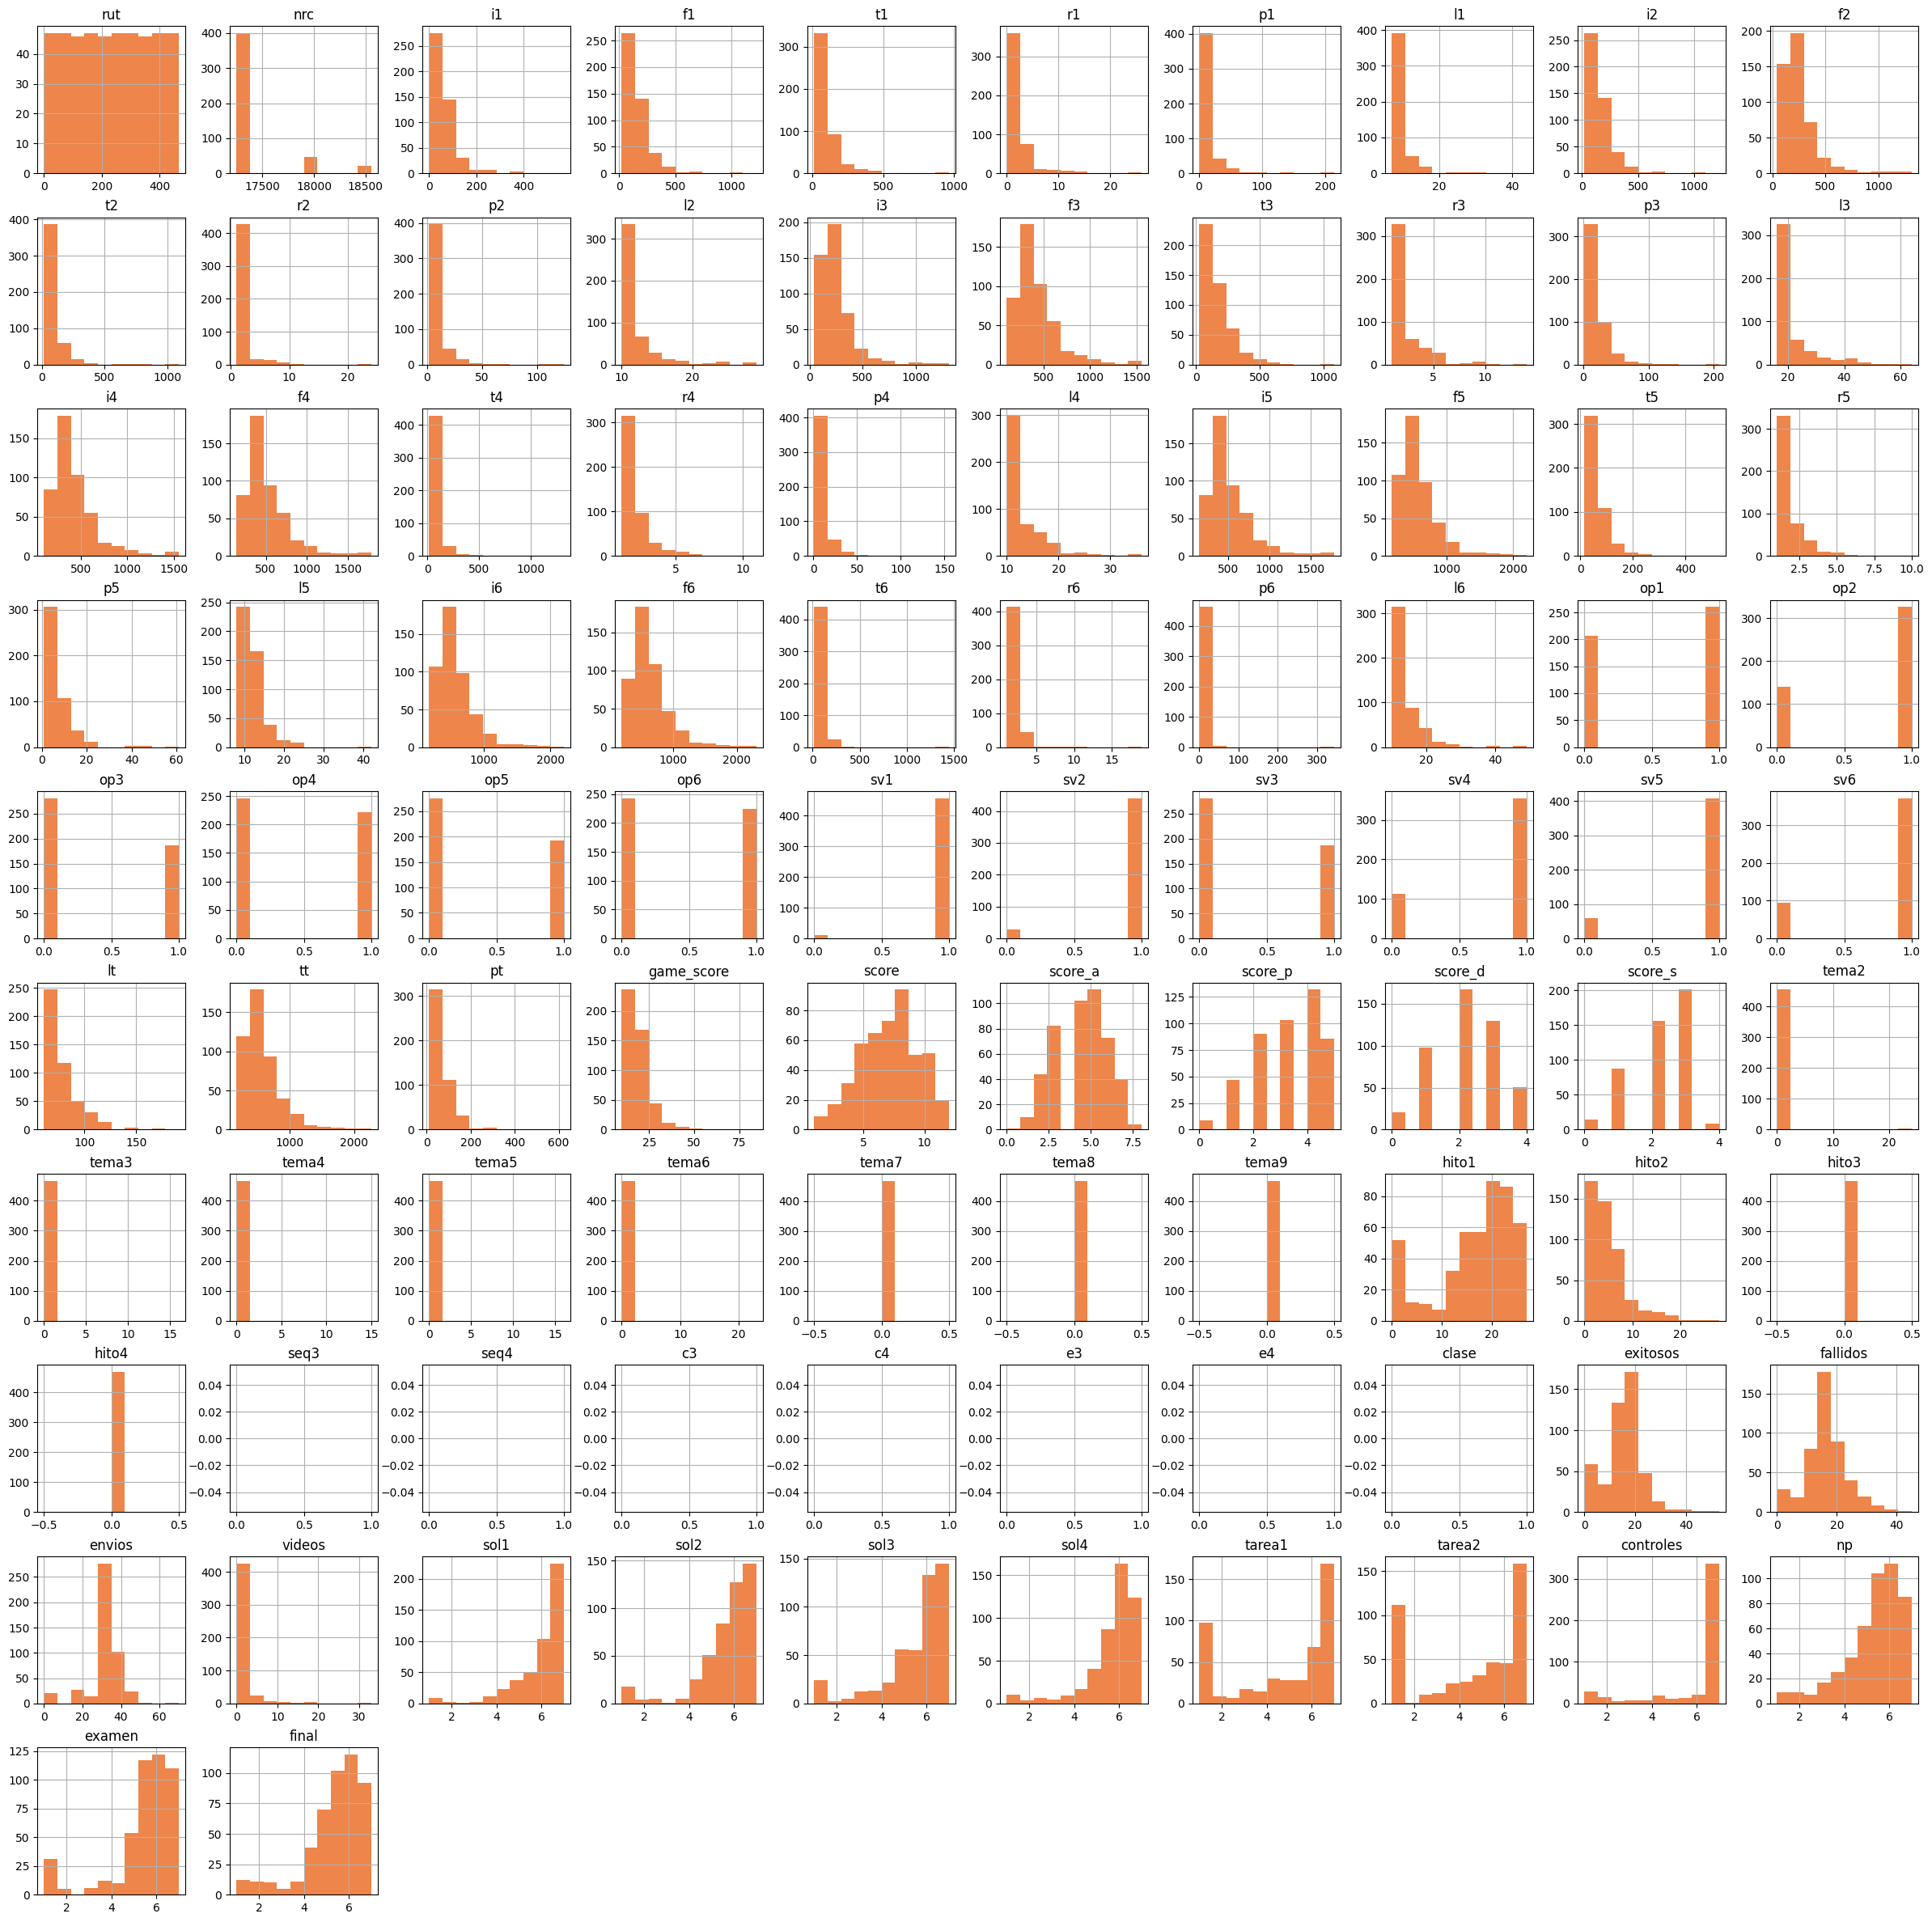

In [26]:
# DISTRIBUCIÓN DE LOS DATOS: DATA_A
df_data_a.hist(figsize=(30,30), color=colores[1])
plt.show()

<Figure size 1200x600 with 0 Axes>

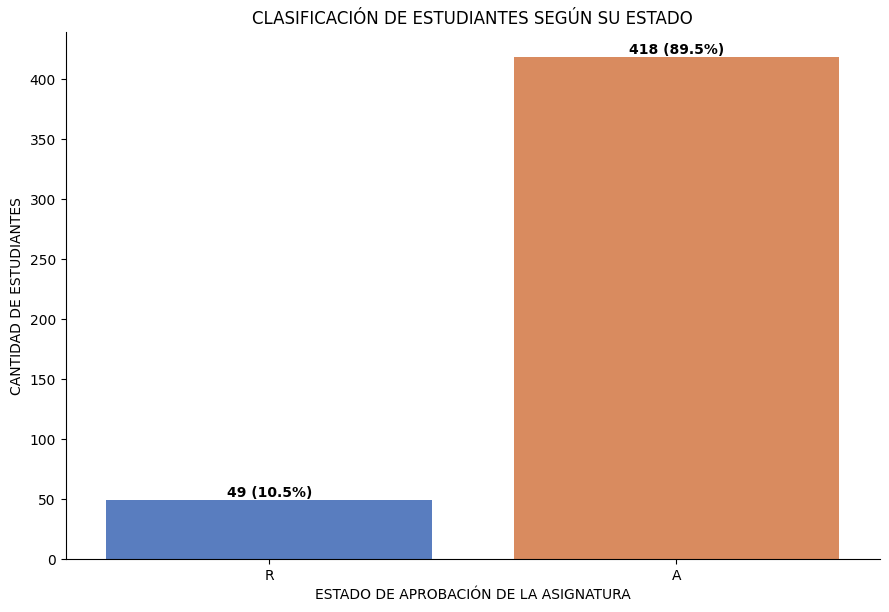

In [27]:
plt.figure(figsize=(12, 6))

# GRÁFICO: ¿CUANTOS ESTUDIANTES SEGUN SU ESTADO (A) O (R) ESTAN REGISTRADOS EN EL DATASET?
plot = sns.catplot(data=df_data_a, x="estado", kind="count", height=6, aspect=1.5, palette="muted", hue="estado", legend=False)
plot.set_axis_labels("ESTADO DE APROBACIÓN DE LA ASIGNATURA", "CANTIDAD DE ESTUDIANTES")
total = len(df_data_a)

for ax in plot.axes.flat:
    for p in ax.patches:
        count = int(p.get_height())
        pct = 100 * count / total
        ax.annotate(f'{count} ({pct:.1f}%)', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.title("CLASIFICACIÓN DE ESTUDIANTES SEGÚN SU ESTADO")
plt.show()

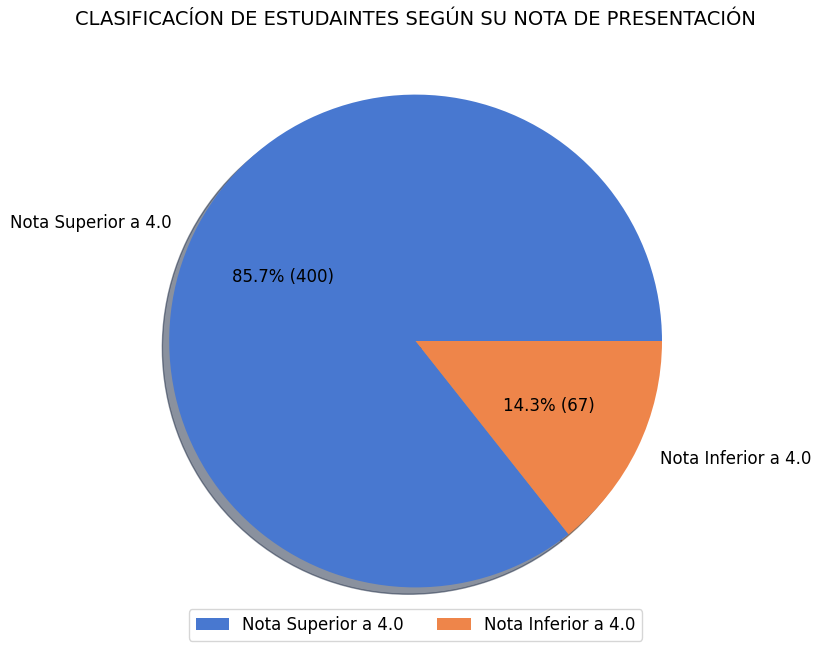

In [28]:
# CLASIFICACION DE ESTUDIANTES SEGUN SU NOTA DE PRESENTACION 
notas_presentacion = df_data_a['np'].apply(lambda x: 'Nota Inferior a 4.0' if x <= 4 else 'Nota Superior a 4.0').value_counts()

colors = sns.color_palette("muted", len(notas_presentacion))

def autopct_format(pct, values):
    total = sum(values)
    val = int(round(pct * total / 100.0))
    return f'{pct:.1f}% ({val})'

# Crear la gráfica de pastel
plt.figure(figsize=(8, 8))
plt.title("CLASIFICACÍON DE ESTUDAINTES SEGÚN SU NOTA DE PRESENTACIÓN", size=14)
plt.pie(
    notas_presentacion, 
    colors=colors, 
    labels=notas_presentacion.index, 
    textprops={'fontsize': 12}, 
    autopct=lambda pct: autopct_format(pct, notas_presentacion),
    shadow=True
)
plt.legend(labels=notas_presentacion.index, prop={'size': 12}, loc='lower center', ncols=2)

plt.show()

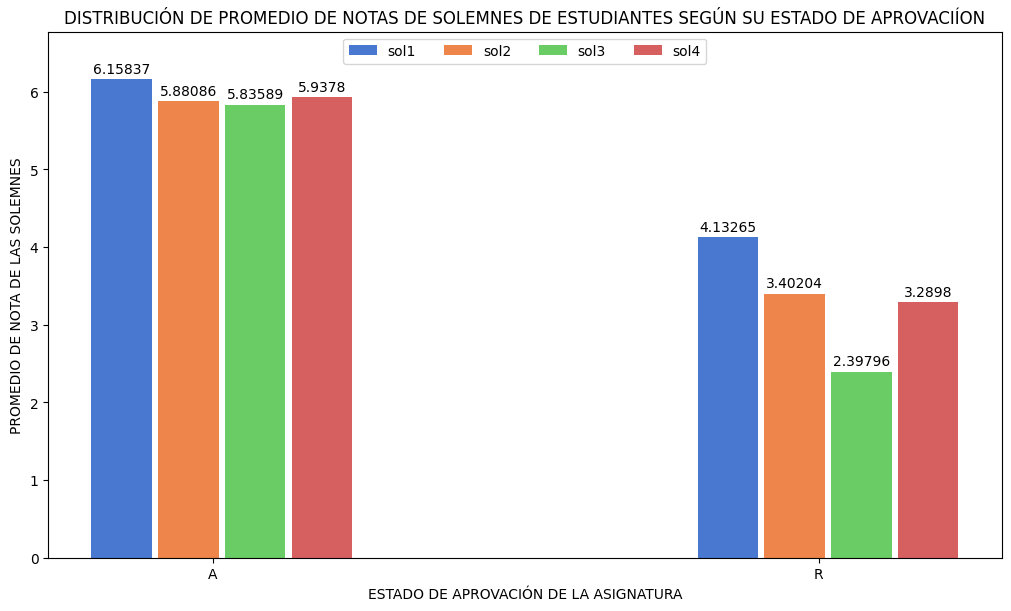

In [29]:
# DISTRIBUCION DE NOTAS DE SOLEMNES DE ESTUDIANTES SEGUN SU ESTADO DE APROVACION DE LA ASIGNATURA
aux_data = df_data_a[['estado', 'sol1', 'sol2', 'sol3', 'sol4']]

# SE AGRUPA LOS ESTUDIANTES SEGUN SU ESTADO Y LUEGO SE SACA EL PROMEDIO DE NOTAS OBTENIDAS DE LA POBLACION DE ESTUDIANTES REGISTRADOS
aux_data_grouped = aux_data.groupby('estado').mean()

width = 0.1
multiplier = 0
x = np.arange(len(aux_data_grouped.index))
colors = sns.color_palette("muted", len(aux_data_grouped.columns))

fig, ax = plt.subplots(layout='constrained')
fig.set_size_inches((10, 6))

for i, (attribute, measurement) in enumerate(aux_data_grouped.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[i])
    ax.bar_label(rects, padding=2)
    multiplier += 1.1

ax.set_title('DISTRIBUCIÓN DE PROMEDIO DE NOTAS DE SOLEMNES DE ESTUDIANTES SEGÚN SU ESTADO DE APROVACIÍON')
ax.set_ylabel('PROMEDIO DE NOTA DE LAS SOLEMNES')
ax.set_xlabel('ESTADO DE APROVACIÓN DE LA ASIGNATURA')
ax.set_xticks(x + width * 1.5, aux_data_grouped.index)
ax.set_ylim(0, aux_data_grouped.to_numpy().max() * 1.1)
ax.legend(loc='upper center', ncols=4)
plt.show()

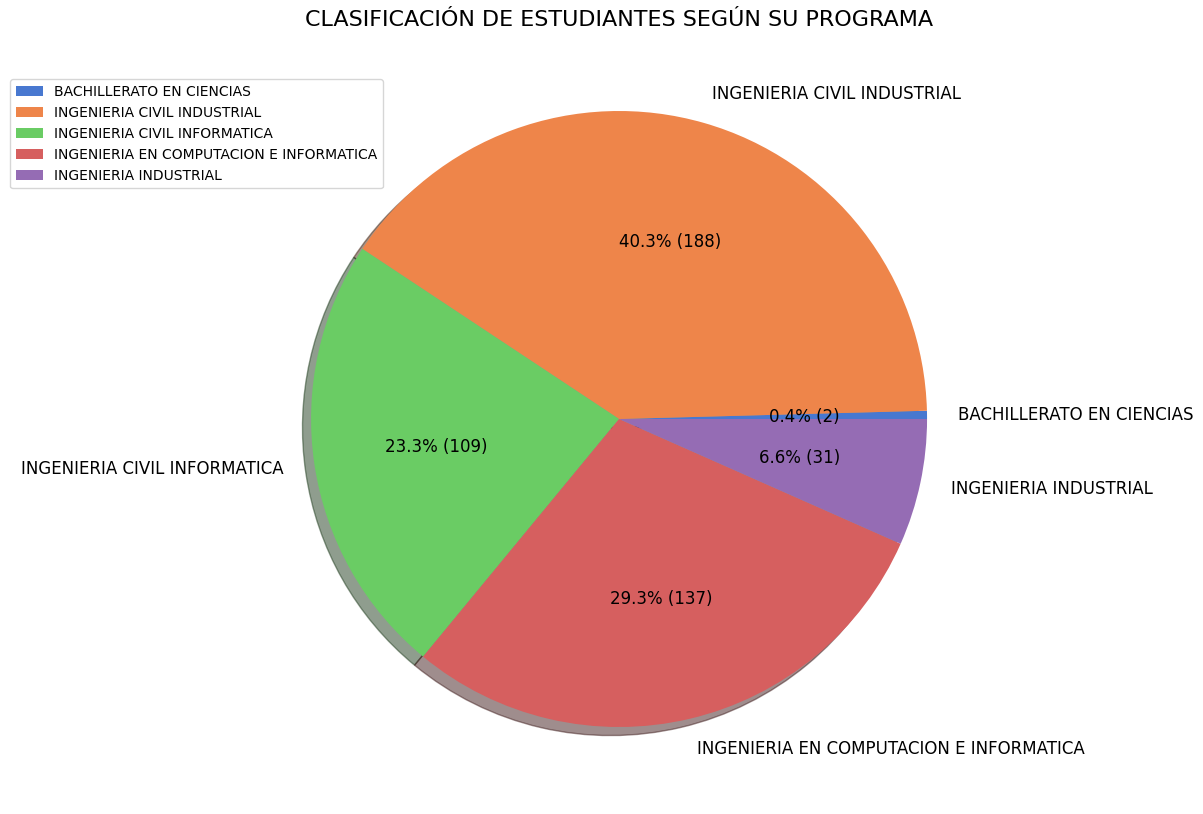

In [30]:
# AGRUPAR A ESTUDIANTES POR PROGRAMA (CARRERA)
programas = df_data_a.groupby(df_data_a['programa']).size()

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}% ({val})'
    return my_format

plt.figure(figsize=(10, 10))
plt.title("CLASIFICACIÓN DE ESTUDIANTES SEGÚN SU PROGRAMA", size=16)
plt.pie(
    programas, 
    colors=colores, 
    labels=programas.index, 
    labeldistance=1.1, 
    textprops={'fontsize': 12}, 
    autopct=autopct_format(programas),
    shadow=True
)
plt.legend(labels=programas.index, prop={'size': 10}, loc='upper left', bbox_to_anchor=(-0.3, 0.95))
plt.show()

#### GRÁFICOS 'df_data_a_2021'

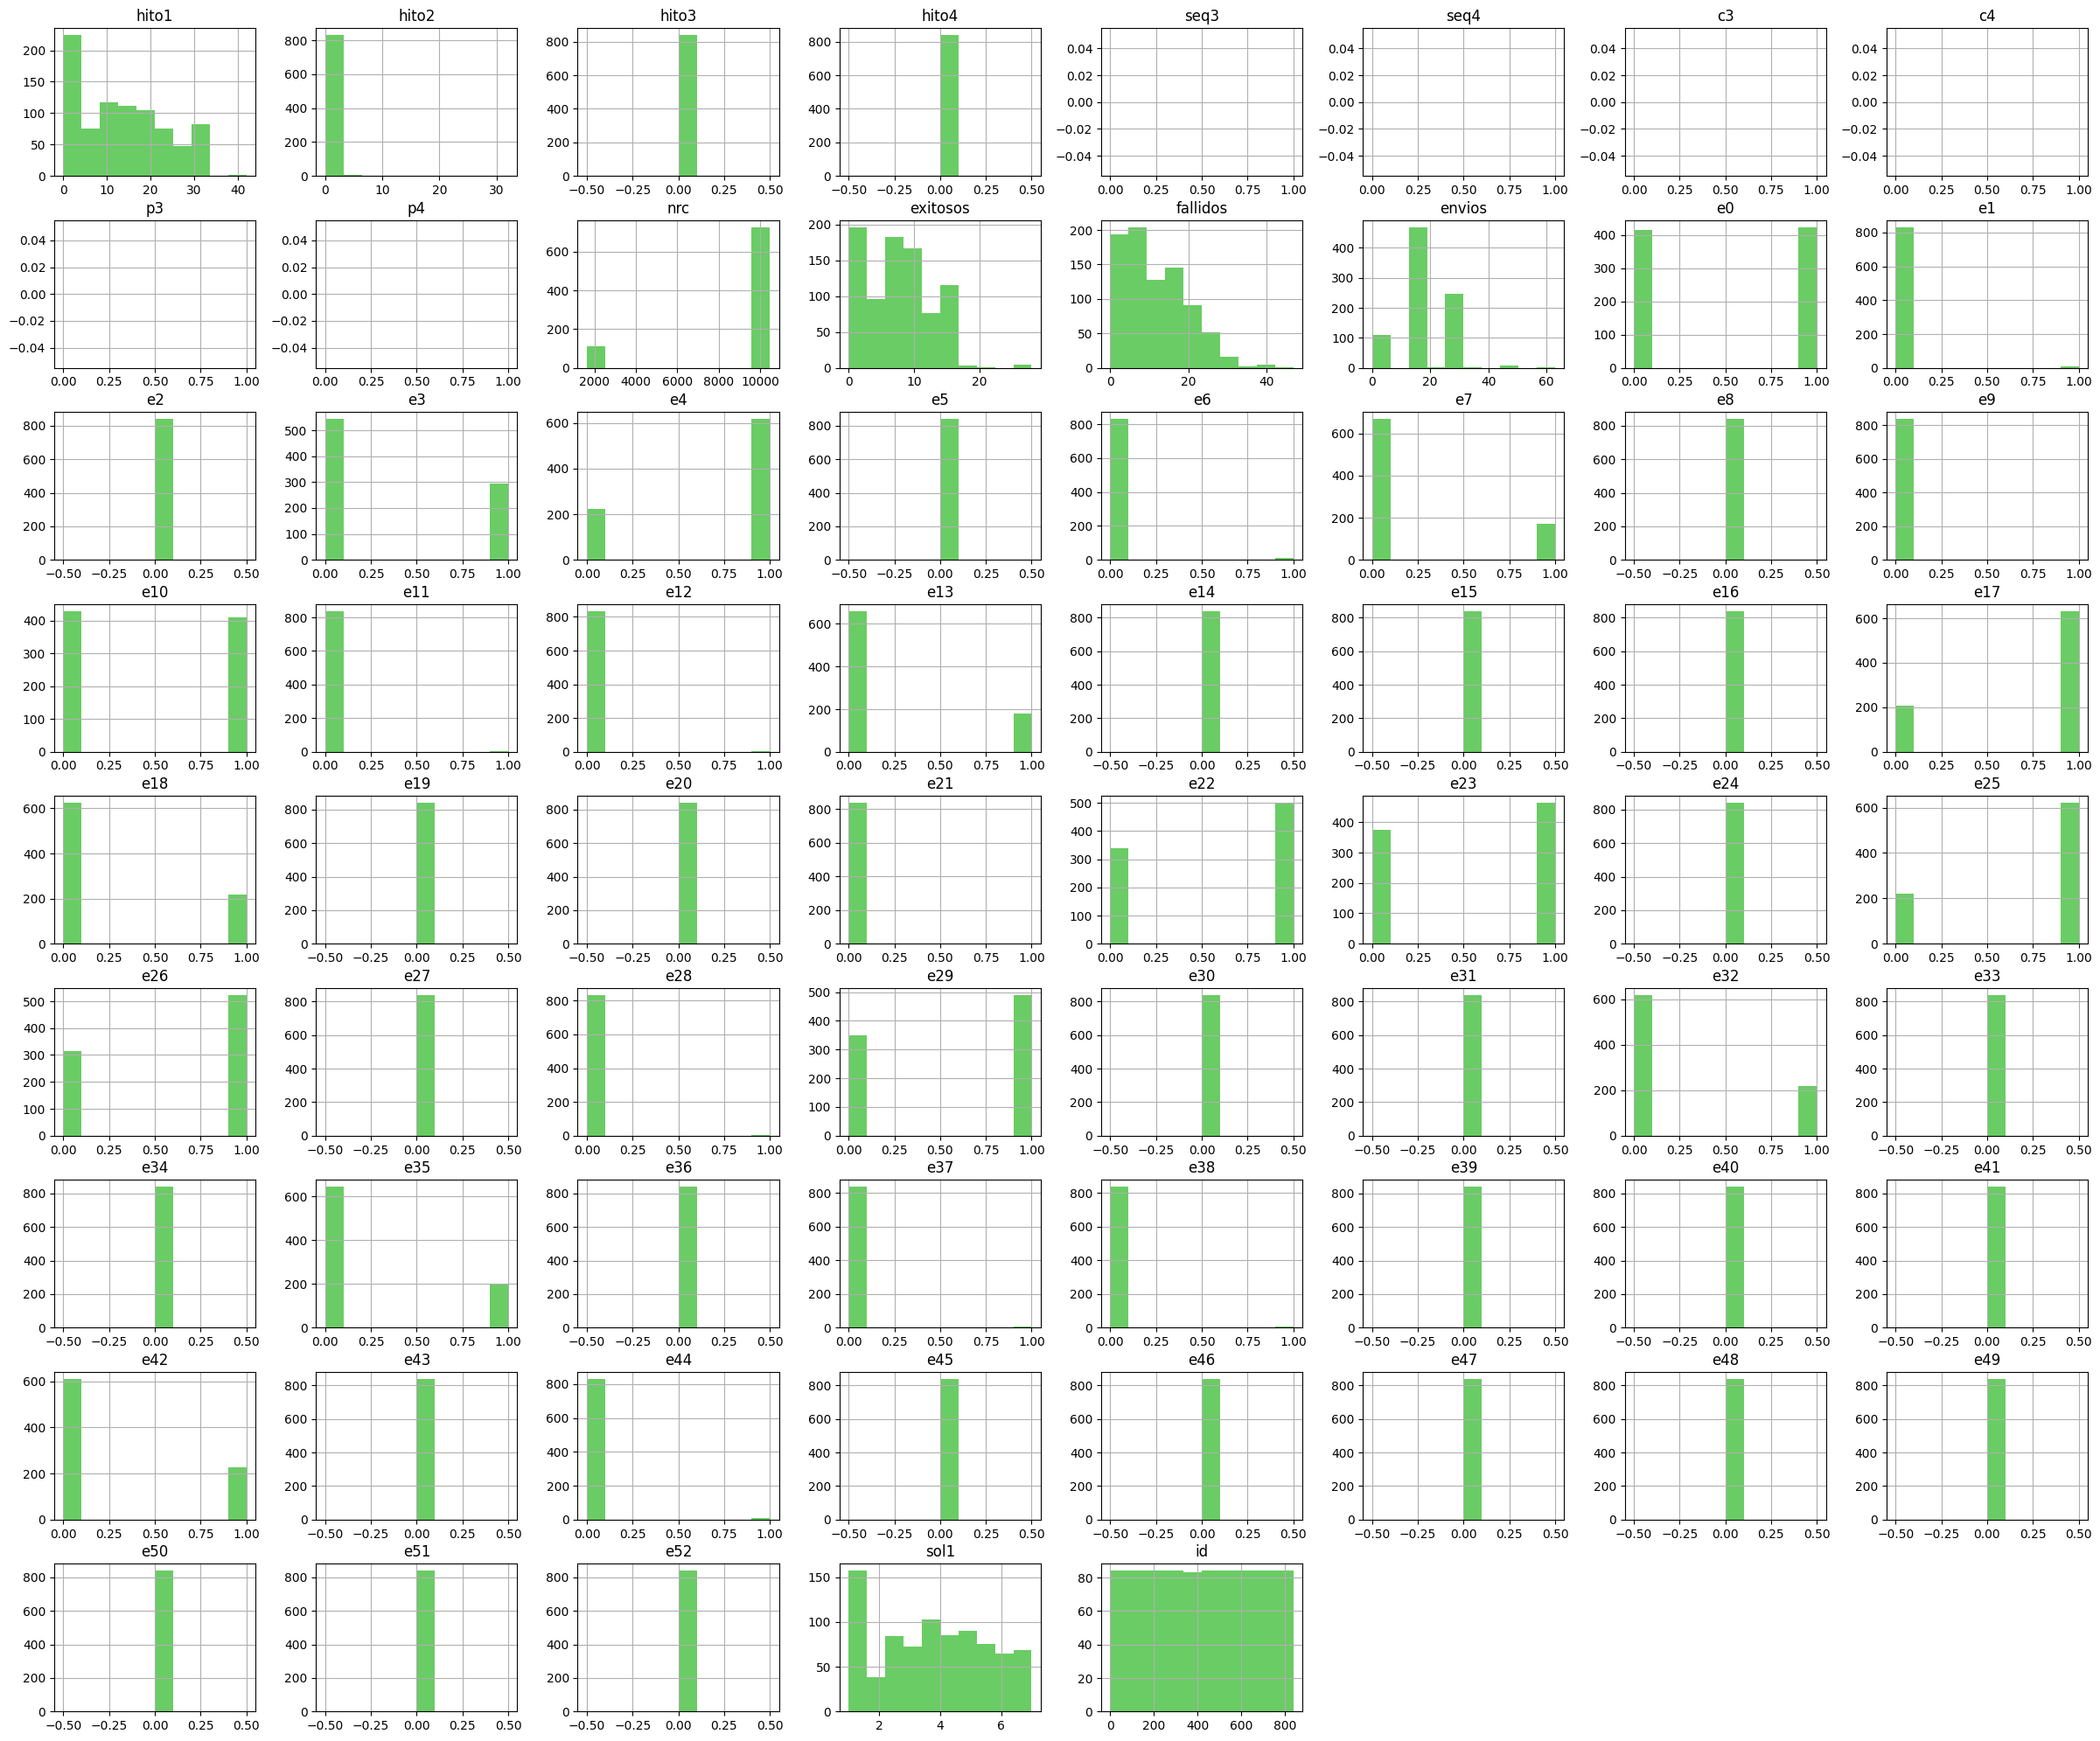

In [31]:
# DISTRIBUCIÓN DE LOS DATOS: DATA_A_2021
df_data_a_2021.hist(figsize=(30, 25), color=colores[2])
plt.show()

In [32]:
# FUENTE: https://programacionacademica.unab.cl/

df_data_a_2021['programa'] = df_data_a_2021['programa'].replace({
    'UNAB12100':'INGENIERIA CIVIL INDUSTRIAL',
    'UNAB22115':'INGENIERIA CIVIL INDUSTRIAL',
    'UNAB22100':'INGENIERIA CIVIL INDUSTRIAL',
    'UNAB22510':'INGENIERIA INDUSTRIAL',
    'UNAB12510':'INGENIERIA INDUSTRIAL',
    'UNAB22505':'INGENIERIA INDUSTRIAL',
    'UNAB21503':'INGENIERIA EN COMPUTACION E INFORMATICA',
    'UNAB11500':'INGENIERIA EN COMPUTACION E INFORMATICA',
    'UNAB21500':'INGENIERIA EN COMPUTACION E INFORMATICA',
    'UNAB12210':'INGENIERIA CIVIL INFORMATICA',
    'UNAB18000':'BACHILLERATO EN CIENCIAS',
    'UNAB16507':'ED. CONTINUA - ECONOMIA Y NEG',
    'UNAB35636':'MAG. EN INGENIERIA INDUSTRIAL',
    'UNAB10100':'PROG. DE INTERCAMBIO',
})

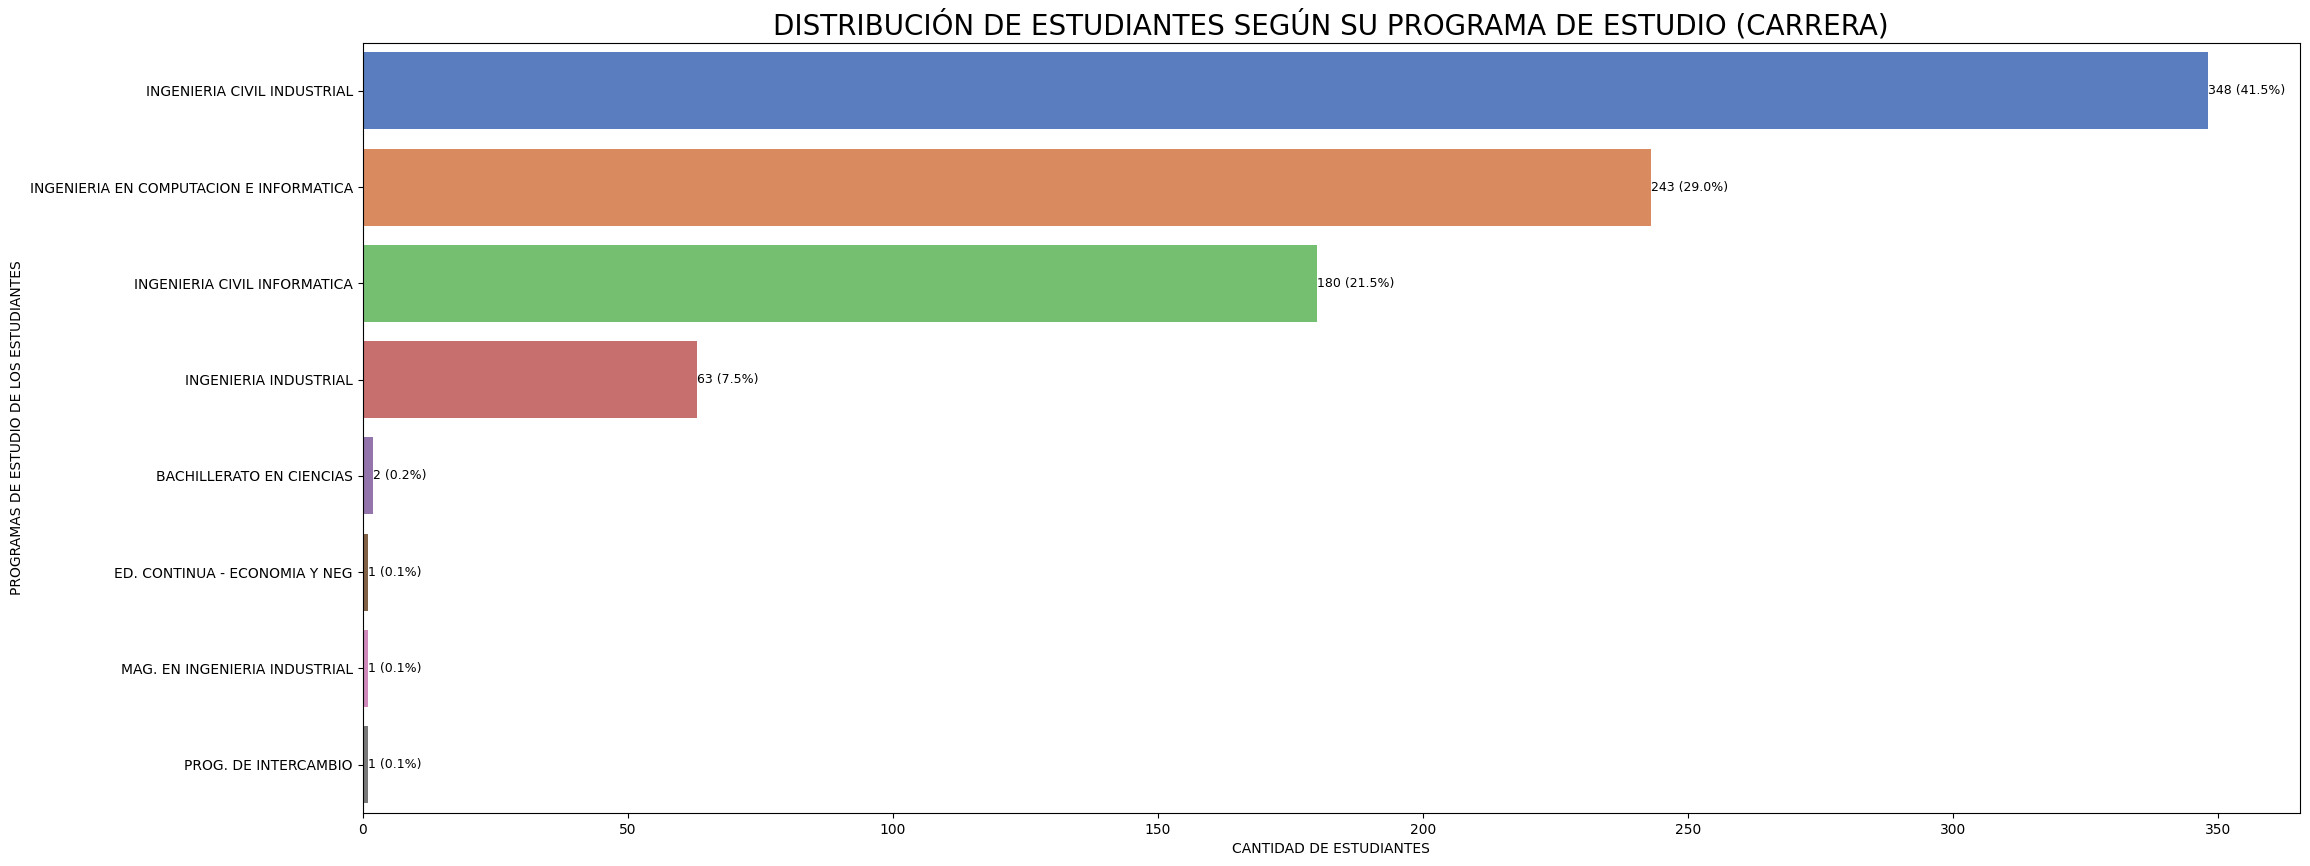

In [33]:
programas = df_data_a_2021['programa'].value_counts()

fig, ax = plt.subplots(figsize=(25, 10))  
sns.barplot(x=programas.values, y=programas.index, orient='h', hue=programas.index, palette='muted', dodge=False, ax=ax)
total_estudiantes = sum(programas.values)

for container in ax.containers:
    for bar in container:
        porcentaje = (bar.get_width() / total_estudiantes) * 100
        ax.bar_label(container, labels=[f'{int(bar.get_width())} ({porcentaje:.1f}%)' for bar in container], fontsize=9)

plt.title('DISTRIBUCIÓN DE ESTUDIANTES SEGÚN SU PROGRAMA DE ESTUDIO (CARRERA)', fontsize=20)
plt.xlabel('CANTIDAD DE ESTUDIANTES')
plt.ylabel('PROGRAMAS DE ESTUDIO DE LOS ESTUDIANTES')
plt.show()


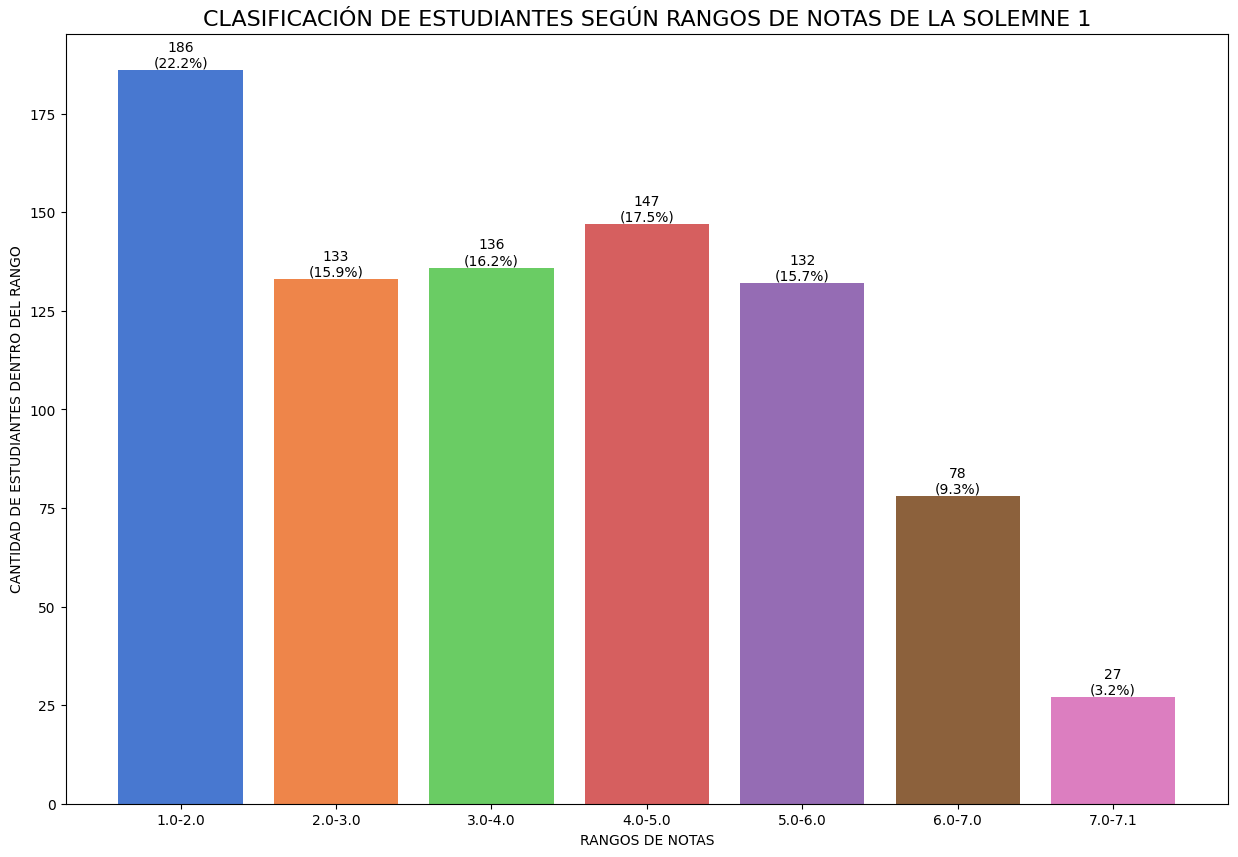

In [34]:
rangos = [(1.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, 5.0), (5.0, 6.0), (6.0, 7.0), (7.0, 7.1)]

def contar_personas_en_rango(df, rango):
    rango_inferior, rango_superior = rango
    return df[(df['sol1'] >= rango_inferior) & (df['sol1'] < rango_superior)].shape[0]

conteo_por_rango = []
for rango in rangos:
    conteo = contar_personas_en_rango(df_data_a_2021, rango)
    conteo_por_rango.append((rango, conteo))

rangos_str = [f"{rango[0]:.1f}-{rango[1]:.1f}" for rango in rangos]
conteos = [conteo for rango, conteo in conteo_por_rango]
total_personas = sum(conteos)

plt.figure(figsize=(15, 10))
bars = plt.bar(rangos_str, conteos, color=colores)

for bar in bars:
    yval = bar.get_height()
    porcentaje = (yval / total_personas) * 100
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}\n({porcentaje:.1f}%)', ha='center', va='bottom')

plt.title('CLASIFICACIÓN DE ESTUDIANTES SEGÚN RANGOS DE NOTAS DE LA SOLEMNE 1', size=16)
plt.xlabel('RANGOS DE NOTAS')
plt.ylabel('CANTIDAD DE ESTUDIANTES DENTRO DEL RANGO')
plt.show()


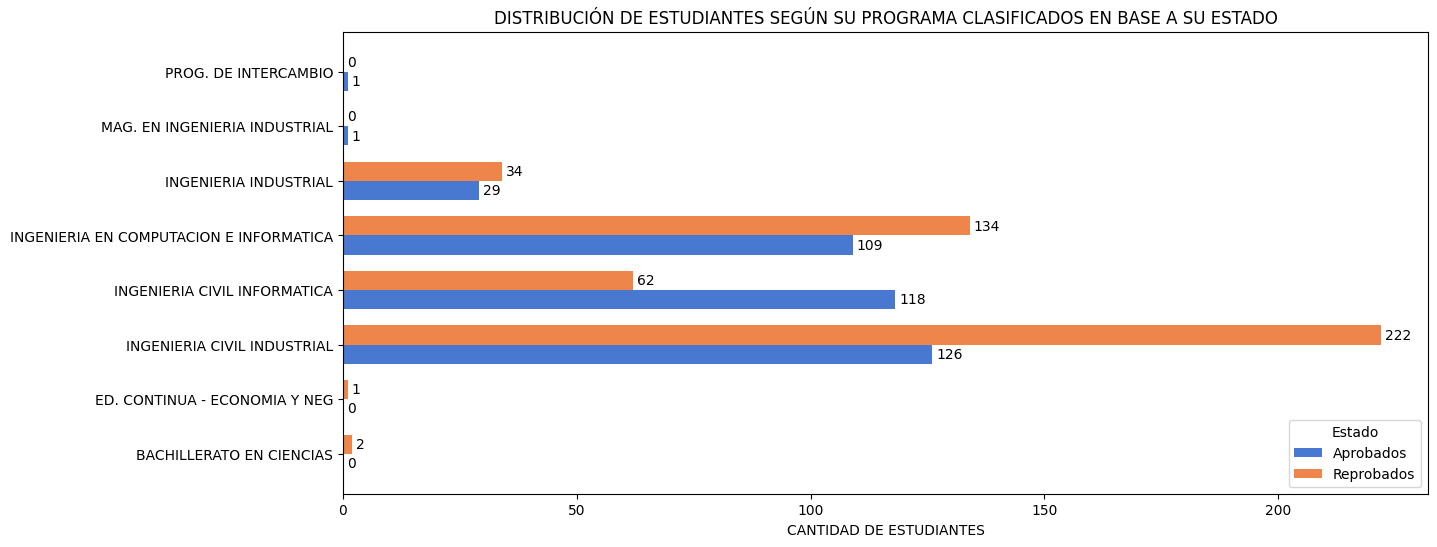

In [35]:
estados = pd.DataFrame({
    'Aprobados': df_data_a_2021[df_data_a_2021['sol1'] >= 4.0].groupby('programa').size(),
    'Reprobados': df_data_a_2021[df_data_a_2021['sol1'] < 4.0].groupby('programa').size()
}).fillna(0).astype(int)

height = 0.35
y = np.arange(len(estados))
colors = sns.color_palette("muted", n_colors=len(estados.columns))

fig, ax = plt.subplots(figsize=(14, 6))

for idx, (attribute, measurement) in enumerate(estados.items()):
    offset = height * idx
    rects = ax.barh(y + offset, measurement, height, label=attribute, color=colors[idx])
    ax.bar_label(rects, padding=3)


ax.set_title('DISTRIBUCIÓN DE ESTUDIANTES SEGÚN SU PROGRAMA CLASIFICADOS EN BASE A SU ESTADO')
ax.set_xlabel('CANTIDAD DE ESTUDIANTES')
ax.set_yticks(y + height / 2)
ax.set_yticklabels(estados.index)
ax.legend(title='Estado', loc='lower right')
ax.set_xlim(0, estados.max().max() + 10)
plt.show()

## 3. PREPARACIÓN DE LOS DATOS

In [108]:
import numpy as np 
import pandas as pd
import warnings as war

war.filterwarnings('ignore')

VAR_DIR_DATA_ORIGINAL = './data/original'
VAR_DIR_DATA_CLEANING = './data/cleaning'

### EJERCICIOS (df_catalogo)

In [109]:
# CARGAR DATASETS DE CATALOGO DE EJERCICIOS
df_catalogo = pd.read_csv(f"{VAR_DIR_DATA_ORIGINAL}/catalogo.csv", sep=";", encoding="latin1")

# Convertir la columna 'hito' a una representación binaria de 4 bits.
# La función apply aplica la conversión solo a valores entre 1 y 4, retornando None para otros valores.
hitos = df_catalogo['hito'].apply(lambda x: format(x, '04b') if 1 <= x <= 4 else None)

# Crear columnas h1, h2, h3, h4 a partir de la representación binaria obtenida.
# Cada columna h1 a h4 representa un bit de la conversión binaria de 'hito'.
df_catalogo['h1'] = hitos.apply(lambda x: int(x[0]) if x else None)  # Primer bit (más significativo)
df_catalogo['h2'] = hitos.apply(lambda x: int(x[1]) if x else None)  # Segundo bit
df_catalogo['h3'] = hitos.apply(lambda x: int(x[2]) if x else None)  # Tercer bit
df_catalogo['h4'] = hitos.apply(lambda x: int(x[3]) if x else None)  # Cuarto bit (menos significativo)

# Crear una nueva columna 'id_ejercicio' que asigna un identificador único a cada ejercicio.
# Esto se realiza utilizando un rango basado en el número de filas en el DataFrame.
df_catalogo['id_ejercicio'] = range(len(df_catalogo))

# Reorganizar las columnas del DataFrame, manteniendo solo las columnas relevantes para el análisis.
df_catalogo = df_catalogo[['id_ejercicio', 'nombre', 'h1', 'h2', 'h3', 'h4', 's1', 's2', 's3', 's4', 'k1', 'k2', 'k3', 'k4', 'hito', 'skill', 'knowledge', 'complexity']]

In [110]:
df_catalogo.head(1)

,id_ejercicio,nombre,h1,h2,h3,h4,s1,s2,s3,s4,k1,k2,k3,k4,hito,skill,knowledge,complexity
0,0,Cálculo del dígito verificador del rut,0,0,0,1,0,0,0,1,0,1,1,1,1,1,7,23


In [111]:
# Crear una nueva columna 'complexity12' que representa la complejidad de cada ejercicio como un número entero.
# Se concatena la representación en string de las columnas relevantes, se rellena con ceros a la izquierda
# hasta alcanzar 12 bits, y se convierte la cadena binaria resultante a un entero.
df_catalogo['complexity12'] = (
    df_catalogo[['h1', 'h2', 'h3', 'h4', 's1', 's2', 's3', 's4', 'k1', 'k2', 'k3', 'k4']]
    .astype(str)                            # Convertir a string para concatenar
    .agg(''.join, axis=1)                   # Concatenar las columnas en una sola cadena
    .apply(lambda x: int(x.zfill(12), 2))   # Convertir la cadena binaria a entero
)

In [112]:
df_catalogo.head(1)

,id_ejercicio,nombre,h1,h2,h3,h4,s1,s2,s3,s4,k1,k2,k3,k4,hito,skill,knowledge,complexity,complexity12
0,0,Cálculo del dígito verificador del rut,0,0,0,1,0,0,0,1,0,1,1,1,1,1,7,23,279


In [113]:
# CARGAR DATOS EXTRAS DEL ARCHIVO EJERCICIO_EDX.XLSX PARA OBTENER MAS INFORMACION DE LOS EJERCICIOS
hito1 = pd.read_excel(f"{VAR_DIR_DATA_ORIGINAL}/ejercicios_edx.xlsx", sheet_name='Hito1')
hito2 = pd.read_excel(f"{VAR_DIR_DATA_ORIGINAL}/ejercicios_edx.xlsx", sheet_name='Hito2')
hito3 = pd.read_excel(f"{VAR_DIR_DATA_ORIGINAL}/ejercicios_edx.xlsx", sheet_name='Hito3')
hito4 = pd.read_excel(f"{VAR_DIR_DATA_ORIGINAL}/ejercicios_edx.xlsx", sheet_name='Hito4')
df_catalogo_extra = pd.concat([hito1, hito2, hito3, hito4], ignore_index=True)
df_catalogo_extra.columns = ['codigo', 'puntos','nombre', 'enunciado', 'abstracción', 'descomposición', 'patrones', 'algoritmo']
df_catalogo_extra = df_catalogo_extra.drop_duplicates(subset=['nombre'], keep='first')

In [114]:
import re

def formatear_texto(texto):
    if isinstance(texto, str):
        texto = texto.strip().lower()           # Eliminar espacios y convertir a minúsculas
        texto = re.sub(r'[^\w\s]', '', texto)   # Eliminar caracteres especiales
        texto = ' '.join(texto.split())         # Eliminar múltiplos espacios
    return texto

df_catalogo_extra['enunciado'] = df_catalogo_extra['enunciado'].apply(formatear_texto)
df_catalogo_extra.head()

,codigo,puntos,nombre,enunciado,abstracción,descomposición,patrones,algoritmo
0,hito1_ej6,1,Ordenar tres números,escribe un programa que reciba tres números en...,NaN,NaN,NaN,NaN
1,tema1_ej1,1,Suma de los N primeros números naturales,la suma de los primeros n numeros naturales es...,NaN,NaN,NaN,NaN
2,hito1_ej1,1,Nota Final,realiza un programa para preguntar al usuario ...,NaN,NaN,NaN,NaN
3,hito1_ej2,2,Contestador Automático,escribe un programa para contestar automáticam...,NaN,NaN,NaN,NaN
4,hito1_ej3,2,Aprobación de Créditos,un banco desea implementar una política de ate...,NaN,NaN,NaN,NaN


In [115]:
from models.utils.analisis import datos_faltantes_dataframe

datos_faltantes_dataframe(df_catalogo_extra)

,Columna,Valores Faltantes,Porcentaje
0,abstracción,50.0,100.0
1,descomposición,50.0,100.0
2,patrones,50.0,100.0
3,algoritmo,50.0,100.0


In [116]:
df_catalogo_extra.drop(labels=['codigo', 'abstracción', 'descomposición', 'patrones', 'algoritmo'], axis=1, inplace=True)
df_catalogo_extra.head()

,puntos,nombre,enunciado
0,1,Ordenar tres números,escribe un programa que reciba tres números en...
1,1,Suma de los N primeros números naturales,la suma de los primeros n numeros naturales es...
2,1,Nota Final,realiza un programa para preguntar al usuario ...
3,2,Contestador Automático,escribe un programa para contestar automáticam...
4,2,Aprobación de Créditos,un banco desea implementar una política de ate...


In [117]:
df_catalogo = pd.merge(df_catalogo, df_catalogo_extra, on='nombre', how='left')
df_catalogo.head(1)

,id_ejercicio,nombre,h1,h2,h3,h4,s1,s2,s3,s4,...,k2,k3,k4,hito,skill,knowledge,complexity,complexity12,puntos,enunciado
0,0,Cálculo del dígito verificador del rut,0,0,0,1,0,0,0,1,...,1,1,1,1,1,7,23,279,2.0,escribe un programa que reciba como dato un nú...


In [118]:
datos_faltantes_dataframe(df_catalogo)

,Columna,Valores Faltantes,Porcentaje
0,puntos,2.0,3.773585
1,enunciado,2.0,3.773585


In [119]:
df_catalogo[df_catalogo['puntos'].isna()]

,id_ejercicio,nombre,h1,h2,h3,h4,s1,s2,s3,s4,...,k2,k3,k4,hito,skill,knowledge,complexity,complexity12,puntos,enunciado
20,20,Multiplicación de Matrices,0,0,1,1,0,1,0,0,...,1,1,1,3,4,7,71,839,NaN,NaN
46,46,Pokemon,0,0,1,1,0,0,1,1,...,1,1,1,3,3,15,63,831,NaN,NaN


In [120]:
# Rellenar el dato del 'enunciado' con el nombre del ejercicio
df_catalogo['enunciado'] = df_catalogo['enunciado'].fillna(df_catalogo['nombre'])

# Calcular el promedio de la columna 'puntos' y redondearlo
promedio_puntos = df_catalogo['puntos'].mean()
df_catalogo['puntos'] = df_catalogo['puntos'].fillna(int(promedio_puntos))

In [121]:
df_catalogo[df_catalogo['puntos'].isna()]

,id_ejercicio,nombre,h1,h2,h3,h4,s1,s2,s3,s4,...,k2,k3,k4,hito,skill,knowledge,complexity,complexity12,puntos,enunciado


In [122]:
df_catalogo.head()

,id_ejercicio,nombre,h1,h2,h3,h4,s1,s2,s3,s4,...,k2,k3,k4,hito,skill,knowledge,complexity,complexity12,puntos,enunciado
0,0,Cálculo del dígito verificador del rut,0,0,0,1,0,0,0,1,...,1,1,1,1,1,7,23,279,2.0,escribe un programa que reciba como dato un nú...
1,1,Calculadora Geométrica,0,0,1,0,0,0,0,1,...,0,0,1,2,1,1,17,529,2.0,construye un programa que permita calcular el ...
2,2,Subsecuencias de ADN,0,0,1,0,0,0,1,1,...,1,1,1,2,3,7,55,567,5.0,escribe un programa que reciba como entrada un...
3,3,Números Primos,0,0,0,1,0,0,0,0,...,0,1,1,1,0,3,3,259,2.0,escribe una función llamada es_primo que retor...
4,4,Nota Final,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,1,257,1.0,realiza un programa para preguntar al usuario ...


In [123]:
df_evaluacion = pd.read_csv(f"{VAR_DIR_DATA_ORIGINAL}/evaluacion.csv", sep=";", encoding="latin1")

In [124]:
def calcular_puntaje_personalizado_prueba(row, cols: list[str]) -> int:
    grupo = row[cols]
    puntaje = 15 * (sum(grupo)/len(cols))
    return int(puntaje)

df_evaluacion.columns = ['codigo', 'puntos', 'id', 'nombre', 'dificultad', 'score_a1','score_a2', 'score_a3', 'score_a4', 'score_d1', 'score_d2', 'score_d3', 'score_d4', 'score_p1', 'score_p2', 'score_p3', 'score_p4', 'score_s1', 'score_s2', 'score_s3', 'score_s4']
df_evaluacion['score_a'] = df_evaluacion.apply(lambda row: calcular_puntaje_personalizado_prueba(row, ['score_a1','score_a2', 'score_a3', 'score_a4']), axis=1)
df_evaluacion['score_d'] = df_evaluacion.apply(lambda row: calcular_puntaje_personalizado_prueba(row, ['score_d1', 'score_d2', 'score_d3', 'score_d4']), axis=1)
df_evaluacion['score_p'] = df_evaluacion.apply(lambda row: calcular_puntaje_personalizado_prueba(row, ['score_p1', 'score_p2', 'score_p3', 'score_p4']), axis=1)
df_evaluacion['score_s'] = df_evaluacion.apply(lambda row: calcular_puntaje_personalizado_prueba(row, ['score_s1', 'score_s2', 'score_s3', 'score_s4']), axis=1)

df_evaluacion.head()

,codigo,puntos,id,nombre,dificultad,score_a1,score_a2,score_a3,score_a4,score_d1,...,score_p3,score_p4,score_s1,score_s2,score_s3,score_s4,score_a,score_d,score_p,score_s
0,hito1_ej6,1,25,Ordenar tres nÃºmeros,1.25,1.0,0.00,0.25,1.0,1.00,...,0.00,1.00,0.25,0.00,0.0,0.0,8,8,4,0
1,tema1_ej1,1,17,Suma de los N primeros nÃºmeros naturales,1.25,1.0,0.00,0.25,1.0,0.00,...,0.00,1.00,0.25,0.00,0.0,0.0,8,0,3,0
2,hito1_ej1,1,4,Nota Final,1.25,1.0,0.00,0.25,1.0,0.25,...,0.00,0.75,0.25,0.00,0.0,0.0,8,1,2,0
3,hito1_ej2,2,26,Contestador AutomÃ¡tico,3.00,1.0,0.25,0.25,1.0,0.25,...,0.25,0.25,0.00,0.25,0.0,0.0,9,4,2,0
4,hito1_ej3,2,29,AprobaciÃ³n de CrÃ©ditos,3.00,1.0,0.50,0.50,1.0,0.25,...,0.00,0.50,0.00,0.25,0.0,0.0,11,3,3,0


In [125]:
df_evaluacion = df_evaluacion[['id','dificultad', 'score_a', 'score_d', 'score_p', 'score_s']]
df_evaluacion.columns = ['id_ejercicio','dificultad', 'score_a', 'score_d', 'score_p', 'score_s']
df_evaluacion = df_evaluacion.drop_duplicates(subset=['id_ejercicio'], keep='first')

df_evaluacion.head()

,id_ejercicio,dificultad,score_a,score_d,score_p,score_s
0,25,1.25,8,8,4,0
1,17,1.25,8,0,3,0
2,4,1.25,8,1,2,0
3,26,3.00,9,4,2,0
4,29,3.00,11,3,3,0


In [126]:
df_catalogo = pd.merge(df_catalogo, df_evaluacion, on='id_ejercicio', how='left')
df_catalogo.head()

,id_ejercicio,nombre,h1,h2,h3,h4,s1,s2,s3,s4,...,knowledge,complexity,complexity12,puntos,enunciado,dificultad,score_a,score_d,score_p,score_s
0,0,Cálculo del dígito verificador del rut,0,0,0,1,0,0,0,1,...,7,23,279,2.0,escribe un programa que reciba como dato un nú...,2.25,10.0,0.0,4.0,2.0
1,1,Calculadora Geométrica,0,0,1,0,0,0,0,1,...,1,17,529,2.0,construye un programa que permita calcular el ...,2.50,8.0,7.0,2.0,0.0
2,2,Subsecuencias de ADN,0,0,1,0,0,0,1,1,...,7,55,567,5.0,escribe un programa que reciba como entrada un...,5.00,12.0,7.0,8.0,3.0
3,3,Números Primos,0,0,0,1,0,0,0,0,...,3,3,259,2.0,escribe una función llamada es_primo que retor...,1.50,7.0,2.0,2.0,0.0
4,4,Nota Final,0,0,0,1,0,0,0,0,...,1,1,257,1.0,realiza un programa para preguntar al usuario ...,1.25,8.0,1.0,2.0,0.0


In [127]:
from models.utils.analisis import datos_faltantes_dataframe

datos_faltantes_dataframe(df_catalogo)

,Columna,Valores Faltantes,Porcentaje
0,dificultad,9.0,16.981132
1,score_a,9.0,16.981132
2,score_d,9.0,16.981132
3,score_p,9.0,16.981132
4,score_s,9.0,16.981132


In [128]:
df_catalogo.tail()

,id_ejercicio,nombre,h1,h2,h3,h4,s1,s2,s3,s4,...,knowledge,complexity,complexity12,puntos,enunciado,dificultad,score_a,score_d,score_p,score_s
48,48,Sopa de Letras,0,0,1,0,0,1,0,1,...,7,87,599,8.0,crea un programa capaz de resolver el juego co...,5.75,14.0,13.0,9.0,7.0
49,49,Caminos entre ciudades,0,0,1,1,0,0,1,0,...,15,47,815,2.0,crea un programa que reciba como parámetros la...,5.00,14.0,8.0,8.0,4.0
50,50,MCM recursivo,0,1,0,0,0,0,0,1,...,3,19,1043,2.0,implementa un programa recursivo que calcule e...,NaN,NaN,NaN,NaN,NaN
51,51,Combinaciones de Números Binarios,0,1,0,0,1,1,0,0,...,7,199,1223,3.0,escribe un programa que imprima todos los núme...,NaN,NaN,NaN,NaN,NaN
52,52,Ornitología 2,0,0,1,1,0,0,0,0,...,8,8,776,1.0,tu amigo te cuenta que la clasificación de los...,4.25,11.0,8.0,4.0,0.0


In [129]:
df_catalogo['dificultad'] = df_catalogo['dificultad'].fillna(0.0)
df_catalogo['score_a'] = df_catalogo['score_a'].fillna(0.0)
df_catalogo['score_d'] = df_catalogo['score_d'].fillna(0.0)
df_catalogo['score_p'] = df_catalogo['score_p'].fillna(0.0)
df_catalogo['score_s'] = df_catalogo['score_s'].fillna(0.0)

In [130]:
from models.utils.analisis import datos_faltantes_dataframe

datos_faltantes_dataframe(df_catalogo)

,Columna,Valores Faltantes,Porcentaje


In [131]:
df_catalogo.tail()

,id_ejercicio,nombre,h1,h2,h3,h4,s1,s2,s3,s4,...,knowledge,complexity,complexity12,puntos,enunciado,dificultad,score_a,score_d,score_p,score_s
48,48,Sopa de Letras,0,0,1,0,0,1,0,1,...,7,87,599,8.0,crea un programa capaz de resolver el juego co...,5.75,14.0,13.0,9.0,7.0
49,49,Caminos entre ciudades,0,0,1,1,0,0,1,0,...,15,47,815,2.0,crea un programa que reciba como parámetros la...,5.00,14.0,8.0,8.0,4.0
50,50,MCM recursivo,0,1,0,0,0,0,0,1,...,3,19,1043,2.0,implementa un programa recursivo que calcule e...,0.00,0.0,0.0,0.0,0.0
51,51,Combinaciones de Números Binarios,0,1,0,0,1,1,0,0,...,7,199,1223,3.0,escribe un programa que imprima todos los núme...,0.00,0.0,0.0,0.0,0.0
52,52,Ornitología 2,0,0,1,1,0,0,0,0,...,8,8,776,1.0,tu amigo te cuenta que la clasificación de los...,4.25,11.0,8.0,4.0,0.0


### DATA_A & DATA_A_2021

In [132]:
# Se importa el archivo CSV que contiene datos de un conjunto de ejercicios (dataset_a).
df_data_a = pd.read_csv(f"{VAR_DIR_DATA_ORIGINAL}/dataset_a.csv", sep=";", encoding="latin1")
df_data_a.head(1)

,rut,usuario,correo,nombre,nrc,profesor,i1,f1,t1,r1,...,sol2,sol3,sol4,tarea1,tarea2,controles,np,examen,final,estado
0,5,*,*,*,17346,*,275.250242,447.08369,171.833448,3,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,R


In [133]:
print(dimensiones_dataframe(df_data_a))

[+] Número de Filas: 467
[+] Número de Columnas: 110
[+] Nombres de Columnas: ['rut', 'usuario', 'correo', 'nombre', 'nrc', 'profesor', 'i1', 'f1', 't1', 'r1', 'p1', 's1', 'l1', 'i2', 'f2', 't2', 'r2', 'p2', 's2', 'l2', 'i3', 'f3', 't3', 'r3', 'p3', 's3', 'l3', 'i4', 'f4', 't4', 'r4', 'p4', 's4', 'l4', 'i5', 'f5', 't5', 'r5', 'p5', 's5', 'l5', 'i6', 'f6', 't6', 'r6', 'p6', 's6', 'l6', 'op1', 'op2', 'op3', 'op4', 'op5', 'op6', 'sv1', 'sv2', 'sv3', 'sv4', 'sv5', 'sv6', 'lt', 'tt', 'pt', 'game_score', 'score', 'score_a', 'score_p', 'score_d', 'score_s', 'tema2', 'tema3', 'tema4', 'tema5', 'tema6', 'tema7', 'tema8', 'tema9', 'hito1', 'hito2', 'hito3', 'hito4', 'seq1', 'seq2', 'seq3', 'seq4', 'c1', 'c2', 'c3', 'c4', 'e1', 'e2', 'e3', 'e4', 'clase', 'exitosos', 'fallidos', 'envios', 'videos', 'programa', 'sol1', 'sol2', 'sol3', 'sol4', 'tarea1', 'tarea2', 'controles', 'np', 'examen', 'final', 'estado']



In [134]:
# Se importa un segundo archivo CSV que contiene datos del año 2021 (dataset_a_2021).
df_data_a_2021 = pd.read_csv(f"{VAR_DIR_DATA_ORIGINAL}/dataset_a_2021.csv", sep=";", encoding="latin1")
df_data_a_2021.head(1)

,hito1,hito2,hito3,hito4,seq1,seq2,seq3,seq4,c1,c2,...,e46,e47,e48,e49,e50,e51,e52,programa,sol1,id
0,17.0,0.0,0,0,abacabadadacbhbbadad,NaN,NaN,NaN,:1:2:1:3:3:2:23:17:3:3,NaN,...,0,0,0,0,0,0,0,UNAB22115,1.0,1


In [135]:
print(dimensiones_dataframe(df_data_a_2021))

[+] Número de Filas: 839
[+] Número de Columnas: 76
[+] Nombres de Columnas: ['hito1', 'hito2', 'hito3', 'hito4', 'seq1', 'seq2', 'seq3', 'seq4', 'c1', 'c2', 'c3', 'c4', 'p1', 'p2', 'p3', 'p4', 'nrc', 'exitosos', 'fallidos', 'envios', 'e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25', 'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'programa', 'sol1', 'id']



In [136]:
# Se ordena el DataFrame df_data_a por la columna 'rut' en orden ascendente.
df_data_a = df_data_a.sort_values(by='rut', ascending=True)

# Se ordena el DataFrame df_data_a_2021 por la columna 'id' en orden ascendente.
# Luego, se elimina la columna 'id' del DataFrame.
df_data_a_2021 = df_data_a_2021.sort_values(by='id', ascending=True).drop(labels=['id'], axis=1)

# Se corrige el rango de 'rut' en df_data_a_2021 para que no se repitan.
# Los nuevos 'rut' se asignan en un rango basado en el número de filas en df_data_a.
df_data_a_2021['rut'] = list(range(df_data_a.shape[0], df_data_a.shape[0] + df_data_a_2021.shape[0]))  # Id de los estudiantes autoincrmental

In [137]:
# Se seleccionan columnas relevantes del DataFrame df_data_a y se renombrarán algunas de ellas para una mejor claridad.
df_data1 = df_data_a[['rut', 'programa', 'exitosos', 'fallidos', 'e1', 'e2', 'e3', 'e4', 'sol1', 'sol2', 'sol3', 'sol4']]
df_data1.columns = ['id_estudiante','programa','exitosos', 'fallidos', 'ejercicios_hito1', 'ejercicios_hito2', 'ejercicios_hito3', 'ejercicios_hito4', 'solemne_1', 'solemne_2', 'solemne_3', 'solemne_4']
df_data1.head(1)

,id_estudiante,programa,exitosos,fallidos,ejercicios_hito1,ejercicios_hito2,ejercicios_hito3,ejercicios_hito4,solemne_1,solemne_2,solemne_3,solemne_4
283,0,INGENIERIA INDUSTRIAL,15,24,:25:17:4:26:29:23:0:22:10:3:42:18,:6:1:44,NaN,NaN,6.2,6.8,5.1,6.0


In [138]:
# Se seleccionan columnas relevantes del DataFrame df_data_a_2021 y se renombrarán algunas de ellas para mantener la coherencia.
df_data2 = df_data_a_2021[['rut', 'programa', 'exitosos', 'fallidos', 'p1', 'p2', 'p3', 'p4', 'sol1']]
df_data2.columns = ['id_estudiante', 'programa', 'exitosos', 'fallidos', 'ejercicios_hito1', 'ejercicios_hito2', 'ejercicios_hito3', 'ejercicios_hito4', 'solemne_1']

# Se reemplazan los códigos de programa por nombres descriptivos en df_data2.
df_data2['programa'] = df_data2['programa'].replace({
    'UNAB12100':'INGENIERIA CIVIL INDUSTRIAL',
    'UNAB22115':'INGENIERIA CIVIL INDUSTRIAL',
    'UNAB22100':'INGENIERIA CIVIL INDUSTRIAL',
    'UNAB22510':'INGENIERIA INDUSTRIAL',
    'UNAB12510':'INGENIERIA INDUSTRIAL',
    'UNAB22505':'INGENIERIA INDUSTRIAL',
    'UNAB21503':'INGENIERIA EN COMPUTACION E INFORMATICA',
    'UNAB11500':'INGENIERIA EN COMPUTACION E INFORMATICA',
    'UNAB21500':'INGENIERIA EN COMPUTACION E INFORMATICA',
    'UNAB12210':'INGENIERIA CIVIL INFORMATICA',
    'UNAB18000':'BACHILLERATO EN CIENCIAS',
})

df_data2.head(1)

,id_estudiante,programa,exitosos,fallidos,ejercicios_hito1,ejercicios_hito2,ejercicios_hito3,ejercicios_hito4,solemne_1
0,467,INGENIERIA CIVIL INDUSTRIAL,10,21,:25:17:4:26:29:23:0:22:10:3,NaN,NaN,NaN,1.0


In [139]:
dataset = pd.concat([df_data1, df_data2])

In [140]:
dataset

,id_estudiante,programa,exitosos,fallidos,ejercicios_hito1,ejercicios_hito2,ejercicios_hito3,ejercicios_hito4,solemne_1,solemne_2,solemne_3,solemne_4
283,0,INGENIERIA INDUSTRIAL,15,24,:25:17:4:26:29:23:0:22:10:3:42:18,:6:1:44,NaN,NaN,6.2,6.8,5.1,6.0
393,1,INGENIERIA CIVIL INDUSTRIAL,10,6,:25:17:4:26:29:23:0:22:10:3,NaN,NaN,NaN,7.0,6.9,7.0,7.0
99,2,INGENIERIA CIVIL INDUSTRIAL,11,20,:25:17:4:26:29:23:3:42:32:18:35,NaN,NaN,NaN,5.6,6.0,4.5,5.4
59,3,INGENIERIA CIVIL INDUSTRIAL,7,17,:25,NaN,NaN,NaN,3.9,4.7,3.7,4.1
284,4,INGENIERIA EN COMPUTACION E INFORMATICA,13,18,:25:17:4:29:23:0:22:3:42:32:13,:1:44,NaN,NaN,4.6,6.6,4.7,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
834,1301,INGENIERIA CIVIL INFORMATICA,11,5,:25:17:4:26:29:23:0:22:10:3:42,NaN,NaN,NaN,7.0,NaN,NaN,NaN
835,1302,INGENIERIA EN COMPUTACION E INFORMATICA,9,7,:25:17:4:26:29:0:22:10:18,NaN,NaN,NaN,7.0,NaN,NaN,NaN
836,1303,INGENIERIA CIVIL INDUSTRIAL,11,20,:25:17:4:26:29:23:0:22:10:3:35,NaN,NaN,NaN,7.0,NaN,NaN,NaN
837,1304,INGENIERIA CIVIL INFORMATICA,16,15,:25:17:4:26:29:23:0:22:10:3:42:7:32:13:18:35,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [141]:
datos_faltantes_dataframe(dataset)

,Columna,Valores Faltantes,Porcentaje
0,ejercicios_hito1,215.0,16.462481
6,solemne_4,839.0,64.241960
5,solemne_3,839.0,64.241960
4,solemne_2,839.0,64.241960
1,ejercicios_hito2,940.0,71.975498
2,ejercicios_hito3,1306.0,100.000000
3,ejercicios_hito4,1306.0,100.000000


In [142]:
# Función para convertir el formato de texto en lista de números
def convertir_a_lista(texto):
    if isinstance(texto, str):  # Verificar si es una cadena
        return list(map(int, texto.strip(':').split(':')))
    else:
        return -1  # En caso de que no sea una cadena (como NaN o float), devolver una lista vacía

# Aplicar la función a la columna del dataframe
dataset['ejercicios_hito1'] = dataset['ejercicios_hito1'].apply(convertir_a_lista)
dataset['ejercicios_hito2'] = dataset['ejercicios_hito2'].apply(convertir_a_lista)
dataset['ejercicios_hito3'] = dataset['ejercicios_hito3'].apply(convertir_a_lista)
dataset['ejercicios_hito4'] = dataset['ejercicios_hito4'].apply(convertir_a_lista)

In [143]:
dataset.head(10)

,id_estudiante,programa,exitosos,fallidos,ejercicios_hito1,ejercicios_hito2,ejercicios_hito3,ejercicios_hito4,solemne_1,solemne_2,solemne_3,solemne_4
283,0,INGENIERIA INDUSTRIAL,15,24,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 42, 18]","[6, 1, 44]",-1,-1,6.2,6.8,5.1,6.0
393,1,INGENIERIA CIVIL INDUSTRIAL,10,6,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3]",-1,-1,-1,7.0,6.9,7.0,7.0
99,2,INGENIERIA CIVIL INDUSTRIAL,11,20,"[25, 17, 4, 26, 29, 23, 3, 42, 32, 18, 35]",-1,-1,-1,5.6,6.0,4.5,5.4
59,3,INGENIERIA CIVIL INDUSTRIAL,7,17,[25],-1,-1,-1,3.9,4.7,3.7,4.1
284,4,INGENIERIA EN COMPUTACION E INFORMATICA,13,18,"[25, 17, 4, 29, 23, 0, 22, 3, 42, 32, 13]","[1, 44]",-1,-1,4.6,6.6,4.7,5.3
0,5,INGENIERIA EN COMPUTACION E INFORMATICA,0,0,-1,-1,-1,-1,1.0,1.0,1.0,1.0
181,6,INGENIERIA EN COMPUTACION E INFORMATICA,10,21,"[25, 17, 4, 26, 29, 0, 22, 10, 32, 13]",-1,-1,-1,6.6,5.0,5.6,5.7
1,7,INGENIERIA CIVIL INDUSTRIAL,0,0,-1,-1,-1,-1,1.0,1.0,1.0,1.0
260,8,INGENIERIA EN COMPUTACION E INFORMATICA,15,24,"[25, 17, 4, 26, 23, 0, 22, 10, 3, 42, 32, 13, 18]","[44, 28]",-1,-1,4.6,4.8,6.4,5.6
158,9,INGENIERIA CIVIL INDUSTRIAL,18,6,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3]",-1,-1,-1,5.3,6.1,6.0,5.8


In [144]:
datos_faltantes_dataframe(dataset)

,Columna,Valores Faltantes,Porcentaje
0,solemne_2,839.0,64.24196
1,solemne_3,839.0,64.24196
2,solemne_4,839.0,64.24196


In [145]:
dataset.tail(10)

,id_estudiante,programa,exitosos,fallidos,ejercicios_hito1,ejercicios_hito2,ejercicios_hito3,ejercicios_hito4,solemne_1,solemne_2,solemne_3,solemne_4
829,1296,INGENIERIA CIVIL INDUSTRIAL,5,42,"[25, 17, 4, 26, 0]",-1,-1,-1,7.0,NaN,NaN,NaN
830,1297,INGENIERIA CIVIL INFORMATICA,10,21,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 7]",-1,-1,-1,7.0,NaN,NaN,NaN
831,1298,INGENIERIA CIVIL INFORMATICA,10,6,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3]",-1,-1,-1,7.0,NaN,NaN,NaN
832,1299,INGENIERIA CIVIL INDUSTRIAL,10,6,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3]",-1,-1,-1,7.0,NaN,NaN,NaN
833,1300,INGENIERIA INDUSTRIAL,12,19,"[25, 17, 4, 26, 23, 0, 22, 3, 32, 13, 18, 35]",-1,-1,-1,7.0,NaN,NaN,NaN
834,1301,INGENIERIA CIVIL INFORMATICA,11,5,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 42]",-1,-1,-1,7.0,NaN,NaN,NaN
835,1302,INGENIERIA EN COMPUTACION E INFORMATICA,9,7,"[25, 17, 4, 26, 29, 0, 22, 10, 18]",-1,-1,-1,7.0,NaN,NaN,NaN
836,1303,INGENIERIA CIVIL INDUSTRIAL,11,20,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 35]",-1,-1,-1,7.0,NaN,NaN,NaN
837,1304,INGENIERIA CIVIL INFORMATICA,16,15,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 42, 7, 3...",-1,-1,-1,7.0,NaN,NaN,NaN
838,1305,INGENIERIA EN COMPUTACION E INFORMATICA,2,29,"[25, 23]",-1,-1,-1,7.0,NaN,NaN,NaN


In [146]:
# Optimización usando operaciones vectorizadas
dataset['solemne_2'] = dataset.apply(lambda row: 1.0 if pd.isna(row['solemne_2']) and row['ejercicios_hito2'] == -1 else 0.0 if pd.isna(row['solemne_2']) else row['solemne_2'], axis=1)
dataset['solemne_3'] = dataset.apply(lambda row: 1.0 if pd.isna(row['solemne_3']) and row['ejercicios_hito3'] == -1 else 0.0 if pd.isna(row['solemne_3']) else row['solemne_3'], axis=1)
dataset['solemne_4'] = dataset.apply(lambda row: 1.0 if pd.isna(row['solemne_4']) and row['ejercicios_hito4'] == -1 else 0.0 if pd.isna(row['solemne_4']) else row['solemne_4'], axis=1)


In [147]:
dataset.tail(10)

,id_estudiante,programa,exitosos,fallidos,ejercicios_hito1,ejercicios_hito2,ejercicios_hito3,ejercicios_hito4,solemne_1,solemne_2,solemne_3,solemne_4
829,1296,INGENIERIA CIVIL INDUSTRIAL,5,42,"[25, 17, 4, 26, 0]",-1,-1,-1,7.0,1.0,1.0,1.0
830,1297,INGENIERIA CIVIL INFORMATICA,10,21,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 7]",-1,-1,-1,7.0,1.0,1.0,1.0
831,1298,INGENIERIA CIVIL INFORMATICA,10,6,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3]",-1,-1,-1,7.0,1.0,1.0,1.0
832,1299,INGENIERIA CIVIL INDUSTRIAL,10,6,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3]",-1,-1,-1,7.0,1.0,1.0,1.0
833,1300,INGENIERIA INDUSTRIAL,12,19,"[25, 17, 4, 26, 23, 0, 22, 3, 32, 13, 18, 35]",-1,-1,-1,7.0,1.0,1.0,1.0
834,1301,INGENIERIA CIVIL INFORMATICA,11,5,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 42]",-1,-1,-1,7.0,1.0,1.0,1.0
835,1302,INGENIERIA EN COMPUTACION E INFORMATICA,9,7,"[25, 17, 4, 26, 29, 0, 22, 10, 18]",-1,-1,-1,7.0,1.0,1.0,1.0
836,1303,INGENIERIA CIVIL INDUSTRIAL,11,20,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 35]",-1,-1,-1,7.0,1.0,1.0,1.0
837,1304,INGENIERIA CIVIL INFORMATICA,16,15,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 42, 7, 3...",-1,-1,-1,7.0,1.0,1.0,1.0
838,1305,INGENIERIA EN COMPUTACION E INFORMATICA,2,29,"[25, 23]",-1,-1,-1,7.0,1.0,1.0,1.0


In [148]:
### PRUEBA DIAGNOSTICO (DATA_A)

# Filtrar y crear un nuevo DataFrame con columnas específicas del DataFrame original 'df_data_a'
df_prueba_diagnostico = df_data_a[['rut', 'videos','score_a','score_p','score_d','score_s','t1','t2','t3','t4','t5','t6','r1','r2','r3','r4','r5','r6','p1','p2','p3','p4','p5','p6','op1','op2','op3','op4','op5','op6','sv1','sv2','sv3','sv4','sv5','sv6']]

# Agregar una nueva columna 'id_estudiante' al DataFrame 'df_prueba_diagnostico' utilizando el identificador 'rut' del DataFrame original
df_prueba_diagnostico.columns=['id_estudiante','videos','score_a','score_p','score_d','score_s','t1','t2','t3','t4','t5','t6','r1','r2','r3','r4','r5','r6','p1','p2','p3','p4','p5','p6','op1','op2','op3','op4','op5','op6','sv1','sv2','sv3','sv4','sv5','sv6']

# Mostrar las primeras cinco filas del DataFrame 'df_prueba_diagnostico' para verificar su contenido
df_prueba_diagnostico.head()

,id_estudiante,videos,score_a,score_p,score_d,score_s,t1,t2,t3,t4,...,op3,op4,op5,op6,sv1,sv2,sv3,sv4,sv5,sv6
283,0,0,5,4,2,3,64.301310,251.056409,224.745993,59.952302,...,0,1,1,0,1,1,0,1,1,1
393,1,0,4,4,2,3,97.170900,93.273640,108.991540,38.273033,...,0,1,0,1,1,1,0,1,0,1
99,2,0,5,4,3,2,85.596734,217.071180,150.406520,96.710100,...,0,0,0,1,1,1,0,0,1,1
59,3,0,3,3,1,2,57.776163,97.665937,187.063634,69.778186,...,0,0,1,0,1,0,0,1,1,0
284,4,0,6,4,3,3,32.519816,57.514397,75.568439,54.644516,...,1,0,1,1,1,1,1,1,1,1


In [149]:
dataset

,id_estudiante,programa,exitosos,fallidos,ejercicios_hito1,ejercicios_hito2,ejercicios_hito3,ejercicios_hito4,solemne_1,solemne_2,solemne_3,solemne_4
283,0,INGENIERIA INDUSTRIAL,15,24,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 42, 18]","[6, 1, 44]",-1,-1,6.2,6.8,5.1,6.0
393,1,INGENIERIA CIVIL INDUSTRIAL,10,6,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3]",-1,-1,-1,7.0,6.9,7.0,7.0
99,2,INGENIERIA CIVIL INDUSTRIAL,11,20,"[25, 17, 4, 26, 29, 23, 3, 42, 32, 18, 35]",-1,-1,-1,5.6,6.0,4.5,5.4
59,3,INGENIERIA CIVIL INDUSTRIAL,7,17,[25],-1,-1,-1,3.9,4.7,3.7,4.1
284,4,INGENIERIA EN COMPUTACION E INFORMATICA,13,18,"[25, 17, 4, 29, 23, 0, 22, 3, 42, 32, 13]","[1, 44]",-1,-1,4.6,6.6,4.7,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
834,1301,INGENIERIA CIVIL INFORMATICA,11,5,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 42]",-1,-1,-1,7.0,1.0,1.0,1.0
835,1302,INGENIERIA EN COMPUTACION E INFORMATICA,9,7,"[25, 17, 4, 26, 29, 0, 22, 10, 18]",-1,-1,-1,7.0,1.0,1.0,1.0
836,1303,INGENIERIA CIVIL INDUSTRIAL,11,20,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 35]",-1,-1,-1,7.0,1.0,1.0,1.0
837,1304,INGENIERIA CIVIL INFORMATICA,16,15,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 42, 7, 3...",-1,-1,-1,7.0,1.0,1.0,1.0


In [150]:
# Unión de los DataFrames en función de 'id_estudiante'
dataset = pd.merge(dataset, df_prueba_diagnostico, on='id_estudiante', how='left')

dataset

,id_estudiante,programa,exitosos,fallidos,ejercicios_hito1,ejercicios_hito2,ejercicios_hito3,ejercicios_hito4,solemne_1,solemne_2,...,op3,op4,op5,op6,sv1,sv2,sv3,sv4,sv5,sv6
0,0,INGENIERIA INDUSTRIAL,15,24,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 42, 18]","[6, 1, 44]",-1,-1,6.2,6.8,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,1,INGENIERIA CIVIL INDUSTRIAL,10,6,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3]",-1,-1,-1,7.0,6.9,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2,2,INGENIERIA CIVIL INDUSTRIAL,11,20,"[25, 17, 4, 26, 29, 23, 3, 42, 32, 18, 35]",-1,-1,-1,5.6,6.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
3,3,INGENIERIA CIVIL INDUSTRIAL,7,17,[25],-1,-1,-1,3.9,4.7,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,4,INGENIERIA EN COMPUTACION E INFORMATICA,13,18,"[25, 17, 4, 29, 23, 0, 22, 3, 42, 32, 13]","[1, 44]",-1,-1,4.6,6.6,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,1301,INGENIERIA CIVIL INFORMATICA,11,5,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 42]",-1,-1,-1,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1302,1302,INGENIERIA EN COMPUTACION E INFORMATICA,9,7,"[25, 17, 4, 26, 29, 0, 22, 10, 18]",-1,-1,-1,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1303,1303,INGENIERIA CIVIL INDUSTRIAL,11,20,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 35]",-1,-1,-1,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1304,1304,INGENIERIA CIVIL INFORMATICA,16,15,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 42, 7, 3...",-1,-1,-1,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
datos_faltantes_dataframe(dataset)

,Columna,Valores Faltantes,Porcentaje
0,videos,839.0,64.24196
1,score_a,839.0,64.24196
2,score_p,839.0,64.24196
3,score_d,839.0,64.24196
4,score_s,839.0,64.24196
5,t1,839.0,64.24196
6,t2,839.0,64.24196
7,t3,839.0,64.24196
8,t4,839.0,64.24196
9,t5,839.0,64.24196


In [80]:
# videos vistos por usuarios
dataset['videos'] = dataset['videos'].fillna(0)

# punjates predeterminados => 1.0
score_columns = ['score_a', 'score_d', 'score_p', 'score_s']
dataset[score_columns] = dataset[score_columns].fillna(1.0)

# Tiempo total que realizo (0 porque no realizo nada)
tiempo_columns = ['t1','t2','t3','t4','t5','t6']
dataset[tiempo_columns] = dataset[tiempo_columns].fillna(0.0)

# Resets realizados (0 porque no se realizo)
resets_columns = ['r1','r2','r3','r4','r5','r6']
dataset[resets_columns] = dataset[resets_columns].fillna(0)

# Pruebas realizas
prubeas_columns = ['p1','p2','p3','p4','p5', 'p6']
dataset[prubeas_columns] = dataset[prubeas_columns].fillna(0)

# Resolucion optima del problema
optimos_columns = ['op1','op2','op3','op4','op5','op6']
dataset[optimos_columns] = dataset[optimos_columns].fillna(0)

# Instrucciones permitidas
intrucciones_columns = ['sv1','sv2','sv3','sv4','sv5','sv6']
dataset[intrucciones_columns] = dataset[intrucciones_columns].fillna(0.0)


In [81]:
datos_faltantes_dataframe(dataset)

,Columna,Valores Faltantes,Porcentaje


In [153]:
dataset

,id_estudiante,programa,exitosos,fallidos,ejercicios_hito1,ejercicios_hito2,ejercicios_hito3,ejercicios_hito4,solemne_1,solemne_2,...,op3,op4,op5,op6,sv1,sv2,sv3,sv4,sv5,sv6
0,0,INGENIERIA INDUSTRIAL,15,24,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 42, 18]","[6, 1, 44]",-1,-1,6.2,6.8,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,1,INGENIERIA CIVIL INDUSTRIAL,10,6,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3]",-1,-1,-1,7.0,6.9,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2,2,INGENIERIA CIVIL INDUSTRIAL,11,20,"[25, 17, 4, 26, 29, 23, 3, 42, 32, 18, 35]",-1,-1,-1,5.6,6.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
3,3,INGENIERIA CIVIL INDUSTRIAL,7,17,[25],-1,-1,-1,3.9,4.7,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,4,INGENIERIA EN COMPUTACION E INFORMATICA,13,18,"[25, 17, 4, 29, 23, 0, 22, 3, 42, 32, 13]","[1, 44]",-1,-1,4.6,6.6,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,1301,INGENIERIA CIVIL INFORMATICA,11,5,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 42]",-1,-1,-1,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1302,1302,INGENIERIA EN COMPUTACION E INFORMATICA,9,7,"[25, 17, 4, 26, 29, 0, 22, 10, 18]",-1,-1,-1,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1303,1303,INGENIERIA CIVIL INDUSTRIAL,11,20,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 35]",-1,-1,-1,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1304,1304,INGENIERIA CIVIL INFORMATICA,16,15,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 42, 7, 3...",-1,-1,-1,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
from ast import literal_eval

def crear_lista_ejercicios(n_ejercicios: int, ejercicios_realizados: list[int]) -> list[int]:
    """Crea una lista binaria que indica si un ejercicio fue realizado o no.

    Parámetros:
    - n_ejercicios (int): Número total de ejercicios.
    - ejercicios_realizados (List[int]): Lista de ejercicios realizados.

    Retorna:
    - List[int]: Lista binaria de tamaño n_ejercicios.
    """
    lista_ejercicios = [0] * n_ejercicios
    for ejercicio in ejercicios_realizados:
        if 0 <= ejercicio < n_ejercicios:
            lista_ejercicios[ejercicio] = 1
    return lista_ejercicios


def crear_matriz_factorizacion(df_usuarios: pd.DataFrame, df_items: pd.DataFrame, columna_usuario: str = 'id_estudiante') -> pd.DataFrame:
    """Genera una matriz de factorización de usuarios por ejercicios en formato binario.

    Parámetros:
    - df_usuarios (pd.DataFrame): pd.DataFrame que contiene la información de los usuarios.
    - df_items (pd.DataFrame): pd.DataFrame que contiene la información de los ejercicios.
    - columna_usuario (str): Nombre de la columna que identifica a los usuarios.

    Retorna:
    - pd.DataFrame: Matriz de factorización de usuarios por ejercicios.
    """
    n_items = len(df_items)
    matriz_factorizacion = pd.DataFrame(columns=[f"e{i}" for i in range(n_items)])

    for indice, fila in df_usuarios.iterrows():
        ejercicios = []
        
        if not fila['ejercicios_hito1'] == -1:
            if isinstance(fila['ejercicios_hito1'], list):
                ejercicios += fila['ejercicios_hito1']
            else:
                ejercicios += literal_eval(fila['ejercicios_hito1'])
            
        if not fila['ejercicios_hito2'] == -1:
            if isinstance(fila['ejercicios_hito2'], list):
                ejercicios += fila['ejercicios_hito2']
            else:
                ejercicios += literal_eval(fila['ejercicios_hito2'])

        if not fila['ejercicios_hito3'] == -1:
            if isinstance(fila['ejercicios_hito3'], list):
                ejercicios += fila['ejercicios_hito3']
            else:
                ejercicios += literal_eval(fila['ejercicios_hito3'])

        if not fila['ejercicios_hito4'] == -1:
            if isinstance(fila['ejercicios_hito4'], list):
                ejercicios += fila['ejercicios_hito4']
            else:
                ejercicios += literal_eval(fila['ejercicios_hito4'])


        vector_ejercicios = crear_lista_ejercicios(n_items, ejercicios)
        matriz_factorizacion.loc[len(matriz_factorizacion)] = vector_ejercicios

    matriz_factorizacion[columna_usuario] = df_usuarios[columna_usuario].values
    matriz_factorizacion = matriz_factorizacion[[columna_usuario] + [f"e{i}" for i in range(n_items)]]
    return matriz_factorizacion

In [155]:
# Generar matrix de factorizacion de ejercicios realizados por cada usuario
matrix_factorization = crear_matriz_factorizacion(dataset, df_catalogo)

# Unión de los DataFrames en función de 'id_estudiante'
dataset = pd.merge(dataset, matrix_factorization, on='id_estudiante', how='inner')

In [156]:
dataset

,id_estudiante,programa,exitosos,fallidos,ejercicios_hito1,ejercicios_hito2,ejercicios_hito3,ejercicios_hito4,solemne_1,solemne_2,...,e43,e44,e45,e46,e47,e48,e49,e50,e51,e52
0,0,INGENIERIA INDUSTRIAL,15,24,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 42, 18]","[6, 1, 44]",-1,-1,6.2,6.8,...,0,1,0,0,0,0,0,0,0,0
1,1,INGENIERIA CIVIL INDUSTRIAL,10,6,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3]",-1,-1,-1,7.0,6.9,...,0,0,0,0,0,0,0,0,0,0
2,2,INGENIERIA CIVIL INDUSTRIAL,11,20,"[25, 17, 4, 26, 29, 23, 3, 42, 32, 18, 35]",-1,-1,-1,5.6,6.0,...,0,0,0,0,0,0,0,0,0,0
3,3,INGENIERIA CIVIL INDUSTRIAL,7,17,[25],-1,-1,-1,3.9,4.7,...,0,0,0,0,0,0,0,0,0,0
4,4,INGENIERIA EN COMPUTACION E INFORMATICA,13,18,"[25, 17, 4, 29, 23, 0, 22, 3, 42, 32, 13]","[1, 44]",-1,-1,4.6,6.6,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,1301,INGENIERIA CIVIL INFORMATICA,11,5,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 42]",-1,-1,-1,7.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1302,1302,INGENIERIA EN COMPUTACION E INFORMATICA,9,7,"[25, 17, 4, 26, 29, 0, 22, 10, 18]",-1,-1,-1,7.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1303,1303,INGENIERIA CIVIL INDUSTRIAL,11,20,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 35]",-1,-1,-1,7.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1304,1304,INGENIERIA CIVIL INFORMATICA,16,15,"[25, 17, 4, 26, 29, 23, 0, 22, 10, 3, 42, 7, 3...",-1,-1,-1,7.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
from models.utils.analisis import dimensiones_dataframe

print(dimensiones_dataframe(dataframe=dataset))


[+] Número de Filas: 1306
[+] Número de Columnas: 100
[+] Nombres de Columnas: ['id_estudiante', 'programa', 'exitosos', 'fallidos', 'ejercicios_hito1', 'ejercicios_hito2', 'ejercicios_hito3', 'ejercicios_hito4', 'solemne_1', 'solemne_2', 'solemne_3', 'solemne_4', 'videos', 'score_a', 'score_p', 'score_d', 'score_s', 't1', 't2', 't3', 't4', 't5', 't6', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'op1', 'op2', 'op3', 'op4', 'op5', 'op6', 'sv1', 'sv2', 'sv3', 'sv4', 'sv5', 'sv6', 'e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25', 'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52']



In [158]:
dataset.drop(labels=['ejercicios_hito1', 'ejercicios_hito2', 'ejercicios_hito3', 'ejercicios_hito4'], axis=1, inplace=True)
dataset.head()

,id_estudiante,programa,exitosos,fallidos,solemne_1,solemne_2,solemne_3,solemne_4,videos,score_a,...,e43,e44,e45,e46,e47,e48,e49,e50,e51,e52
0,0,INGENIERIA INDUSTRIAL,15,24,6.2,6.8,5.1,6.0,0.0,5.0,...,0,1,0,0,0,0,0,0,0,0
1,1,INGENIERIA CIVIL INDUSTRIAL,10,6,7.0,6.9,7.0,7.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,2,INGENIERIA CIVIL INDUSTRIAL,11,20,5.6,6.0,4.5,5.4,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
3,3,INGENIERIA CIVIL INDUSTRIAL,7,17,3.9,4.7,3.7,4.1,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4,4,INGENIERIA EN COMPUTACION E INFORMATICA,13,18,4.6,6.6,4.7,5.3,0.0,6.0,...,0,1,0,0,0,0,0,0,0,0


In [159]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 96 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_estudiante  1306 non-null   int64  
 1   programa       1306 non-null   object 
 2   exitosos       1306 non-null   int64  
 3   fallidos       1306 non-null   int64  
 4   solemne_1      1306 non-null   float64
 5   solemne_2      1306 non-null   float64
 6   solemne_3      1306 non-null   float64
 7   solemne_4      1306 non-null   float64
 8   videos         467 non-null    float64
 9   score_a        467 non-null    float64
 10  score_p        467 non-null    float64
 11  score_d        467 non-null    float64
 12  score_s        467 non-null    float64
 13  t1             467 non-null    float64
 14  t2             467 non-null    float64
 15  t3             467 non-null    float64
 16  t4             467 non-null    float64
 17  t5             467 non-null    float64
 18  t6      

In [160]:
df_catalogo.head()

,id_ejercicio,nombre,h1,h2,h3,h4,s1,s2,s3,s4,...,knowledge,complexity,complexity12,puntos,enunciado,dificultad,score_a,score_d,score_p,score_s
0,0,Cálculo del dígito verificador del rut,0,0,0,1,0,0,0,1,...,7,23,279,2.0,escribe un programa que reciba como dato un nú...,2.25,10.0,0.0,4.0,2.0
1,1,Calculadora Geométrica,0,0,1,0,0,0,0,1,...,1,17,529,2.0,construye un programa que permita calcular el ...,2.50,8.0,7.0,2.0,0.0
2,2,Subsecuencias de ADN,0,0,1,0,0,0,1,1,...,7,55,567,5.0,escribe un programa que reciba como entrada un...,5.00,12.0,7.0,8.0,3.0
3,3,Números Primos,0,0,0,1,0,0,0,0,...,3,3,259,2.0,escribe una función llamada es_primo que retor...,1.50,7.0,2.0,2.0,0.0
4,4,Nota Final,0,0,0,1,0,0,0,0,...,1,1,257,1.0,realiza un programa para preguntar al usuario ...,1.25,8.0,1.0,2.0,0.0


In [161]:
dataset.head()

,id_estudiante,programa,exitosos,fallidos,solemne_1,solemne_2,solemne_3,solemne_4,videos,score_a,...,e43,e44,e45,e46,e47,e48,e49,e50,e51,e52
0,0,INGENIERIA INDUSTRIAL,15,24,6.2,6.8,5.1,6.0,0.0,5.0,...,0,1,0,0,0,0,0,0,0,0
1,1,INGENIERIA CIVIL INDUSTRIAL,10,6,7.0,6.9,7.0,7.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,2,INGENIERIA CIVIL INDUSTRIAL,11,20,5.6,6.0,4.5,5.4,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
3,3,INGENIERIA CIVIL INDUSTRIAL,7,17,3.9,4.7,3.7,4.1,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4,4,INGENIERIA EN COMPUTACION E INFORMATICA,13,18,4.6,6.6,4.7,5.3,0.0,6.0,...,0,1,0,0,0,0,0,0,0,0


In [162]:
# ELIMINANDO AQUELLOS ESTUDIANTES QUE PARTICIPAN DE OTROS PROGRAMAS NO REACIONADOS O EJERCEN GRADOS SUPERIORES DEL PREGRADO

programas = dataset.query(" `programa`=='UNAB16507' or `programa`=='UNAB35636' or `programa`=='UNAB10100' ")
dataset.drop(programas.index, inplace=True)
print(dataset.shape)

(1303, 96)


In [163]:
# ELIMINANDO AQUELLOS ESTUDIANTES DONDE NO PARTICIPARON O NO RELIZARON NINGUN EJERCICIO

n = len(df_catalogo)
ultimas_columnas = dataset.columns[-n:]
no_realizados = dataset[(dataset[ultimas_columnas] == 0).all(axis=1)]

dataset.drop(no_realizados.index, inplace=True)
print(dataset.shape)

(1092, 96)


### GUARDAR DATA DE USO

In [93]:
print(dimensiones_dataframe(dataset))

[+] Número de Filas: 1092
[+] Número de Columnas: 96
[+] Nombres de Columnas: ['id_estudiante', 'programa', 'exitosos', 'fallidos', 'solemne_1', 'solemne_2', 'solemne_3', 'solemne_4', 'videos', 'score_a', 'score_p', 'score_d', 'score_s', 't1', 't2', 't3', 't4', 't5', 't6', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'op1', 'op2', 'op3', 'op4', 'op5', 'op6', 'sv1', 'sv2', 'sv3', 'sv4', 'sv5', 'sv6', 'e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25', 'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52']



In [94]:
datos_faltantes_dataframe(dataframe=dataset)

,Columna,Valores Faltantes,Porcentaje


In [95]:
print(dimensiones_dataframe(df_catalogo))

[+] Número de Filas: 53
[+] Número de Columnas: 26
[+] Nombres de Columnas: ['id_ejercicio', 'nombre', 'h1', 'h2', 'h3', 'h4', 's1', 's2', 's3', 's4', 'k1', 'k2', 'k3', 'k4', 'hito', 'skill', 'knowledge', 'complexity', 'complexity12', 'puntos', 'enunciado', 'dificultad', 'score_a', 'score_d', 'score_p', 'score_s']



In [96]:
datos_faltantes_dataframe(dataframe=df_catalogo)

,Columna,Valores Faltantes,Porcentaje


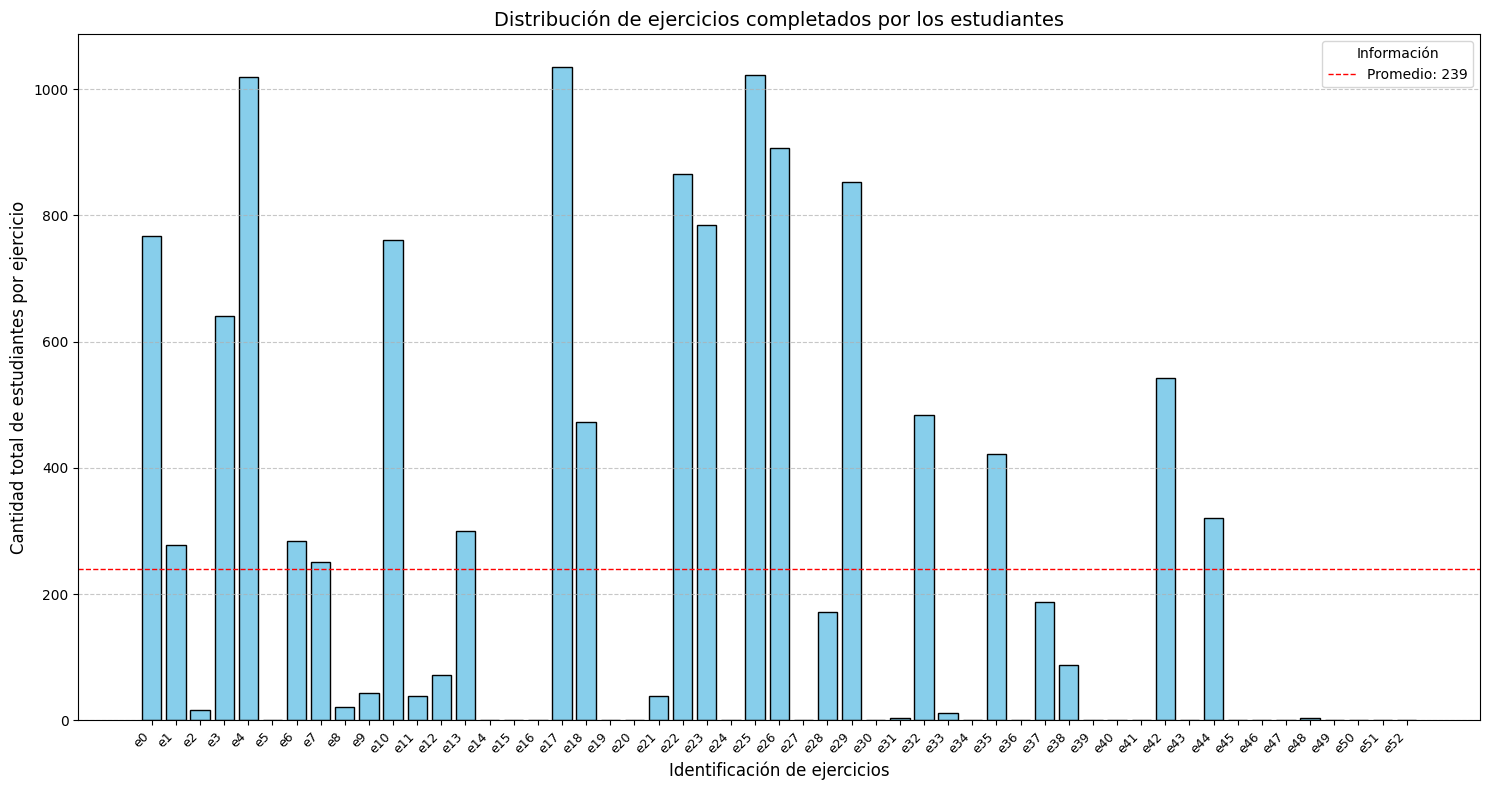

In [97]:
import matplotlib.pyplot as plt
import numpy as np  # Asegúrate de importar numpy

# Variables (supongamos que ya las tienes definidas)
n = len(df_catalogo)
columnas = dataset.columns[-n:]  # Últimas 'n' columnas
valores = dataset.iloc[:, -n:].sum().values.tolist()  # Suma de valores en esas columnas
valores_media = int(np.mean(valores))  # Calcular la media de los valores

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(15, 8))  # Ajustar el tamaño del gráfico para mayor claridad

# Crear barras
ax.bar(columnas, valores, color='skyblue', edgecolor='black')

# Añadir una línea divisoria en la media
ax.axhline(y=valores_media, color='red', linestyle='--', linewidth=1, label=f'Promedio: {valores_media}')

# Configurar etiquetas y título
ax.set_ylabel('Cantidad total de estudiantes por ejercicio', fontsize=12)
ax.set_xlabel('Identificación de ejercicios', fontsize=12)
ax.set_title('Distribución de ejercicios completados por los estudiantes', fontsize=14)
ax.legend(title='Información', fontsize=10)

# Rotar las etiquetas de las columnas para que sean legibles
ax.set_xticks(range(len(columnas)))
ax.set_xticklabels(columnas, rotation=45, ha='right', fontsize=9)

# Añadir rejilla para mejorar la legibilidad
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# mas de 200 -> 19 > mas de 400 -> 14 > mas de 600 -> 10 > mas de 800 -> 6 > mas de 1000 -> 3

In [98]:
print(dataset.shape)
dataset.head()

(1092, 96)


,id_estudiante,programa,exitosos,fallidos,solemne_1,solemne_2,solemne_3,solemne_4,videos,score_a,...,e43,e44,e45,e46,e47,e48,e49,e50,e51,e52
0,0,INGENIERIA INDUSTRIAL,15,24,6.2,6.8,5.1,6.0,0.0,5.0,...,0,1,0,0,0,0,0,0,0,0
1,1,INGENIERIA CIVIL INDUSTRIAL,10,6,7.0,6.9,7.0,7.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,2,INGENIERIA CIVIL INDUSTRIAL,11,20,5.6,6.0,4.5,5.4,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
3,3,INGENIERIA CIVIL INDUSTRIAL,7,17,3.9,4.7,3.7,4.1,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4,4,INGENIERIA EN COMPUTACION E INFORMATICA,13,18,4.6,6.6,4.7,5.3,0.0,6.0,...,0,1,0,0,0,0,0,0,0,0


In [99]:
reprobados = dataset.query(" `solemne_1` < 4.0 and `solemne_2` < 4.0 and `solemne_3` < 4.0 and `solemne_4` < 4.0 ")
copia_dataset = dataset[~dataset['id_estudiante'].isin(reprobados['id_estudiante'])]

In [100]:
reprobados

,id_estudiante,programa,exitosos,fallidos,solemne_1,solemne_2,solemne_3,solemne_4,videos,score_a,...,e43,e44,e45,e46,e47,e48,e49,e50,e51,e52
260,260,INGENIERIA CIVIL INFORMATICA,1,15,3.6,1.9,1.0,1.9,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
381,381,INGENIERIA EN COMPUTACION E INFORMATICA,14,17,2.0,2.4,2.1,2.1,0.0,3.0,...,0,1,0,0,0,0,0,0,0,0
386,386,INGENIERIA CIVIL INDUSTRIAL,7,17,1.0,2.4,1.0,1.5,3.0,7.0,...,0,0,0,0,0,0,0,0,0,0
467,467,INGENIERIA CIVIL INDUSTRIAL,10,21,1.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
468,468,INGENIERIA CIVIL INDUSTRIAL,7,9,1.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,916,INGENIERIA INDUSTRIAL,12,4,3.9,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
918,918,INGENIERIA CIVIL INFORMATICA,11,20,3.9,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
919,919,INGENIERIA CIVIL INFORMATICA,6,10,3.9,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
920,920,INGENIERIA EN COMPUTACION E INFORMATICA,12,4,3.9,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
copia_dataset

,id_estudiante,programa,exitosos,fallidos,solemne_1,solemne_2,solemne_3,solemne_4,videos,score_a,...,e43,e44,e45,e46,e47,e48,e49,e50,e51,e52
0,0,INGENIERIA INDUSTRIAL,15,24,6.2,6.8,5.1,6.0,0.0,5.0,...,0,1,0,0,0,0,0,0,0,0
1,1,INGENIERIA CIVIL INDUSTRIAL,10,6,7.0,6.9,7.0,7.0,0.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,2,INGENIERIA CIVIL INDUSTRIAL,11,20,5.6,6.0,4.5,5.4,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
3,3,INGENIERIA CIVIL INDUSTRIAL,7,17,3.9,4.7,3.7,4.1,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4,4,INGENIERIA EN COMPUTACION E INFORMATICA,13,18,4.6,6.6,4.7,5.3,0.0,6.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,1301,INGENIERIA CIVIL INFORMATICA,11,5,7.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1302,1302,INGENIERIA EN COMPUTACION E INFORMATICA,9,7,7.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1303,1303,INGENIERIA CIVIL INDUSTRIAL,11,20,7.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1304,1304,INGENIERIA CIVIL INFORMATICA,16,15,7.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


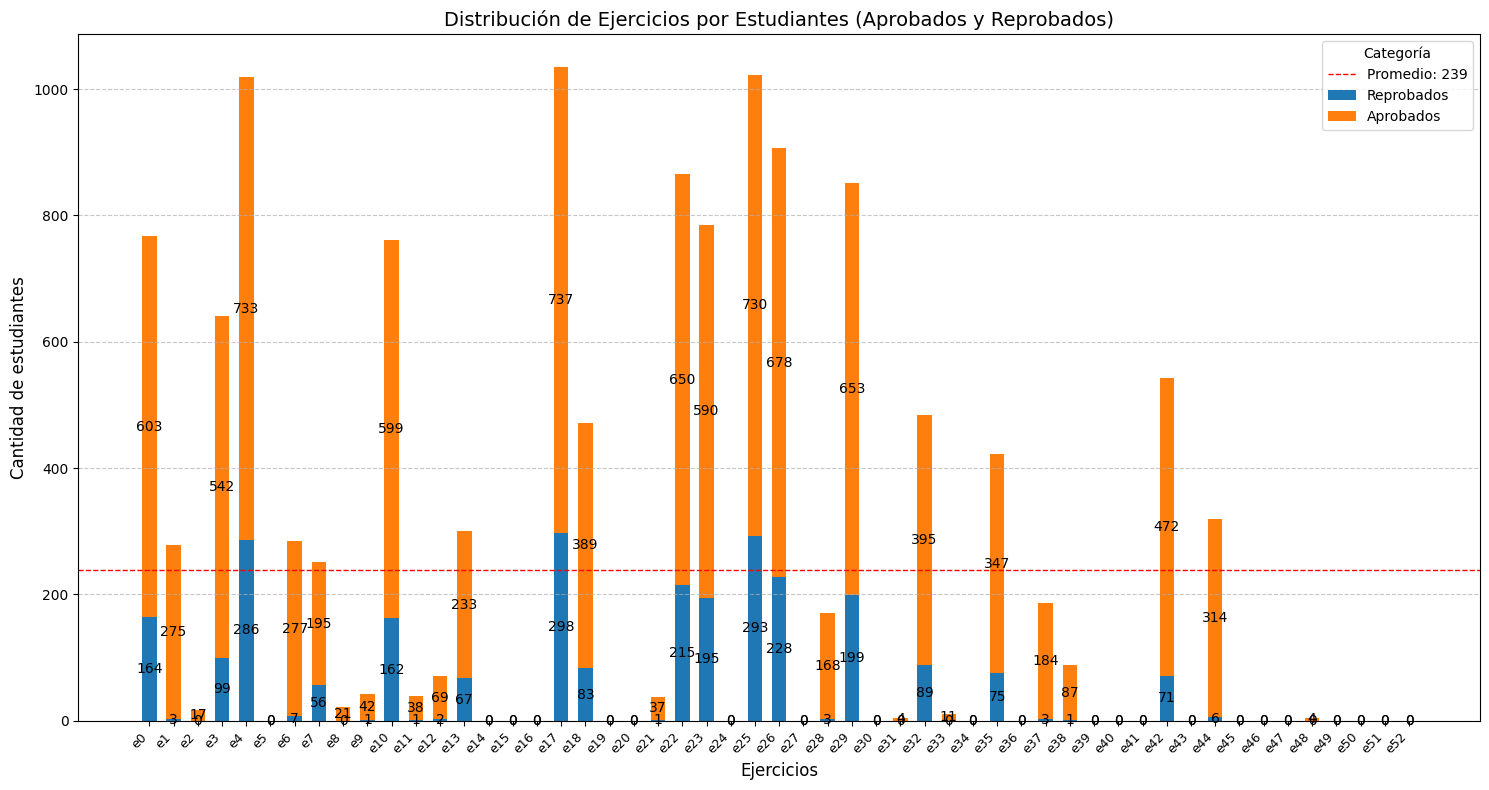

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Variables (supongamos que ya las tienes definidas)
n = len(df_catalogo)
columnas = dataset.columns[-n:]  # Últimas 'n' columnas
valores_reprobados = reprobados.iloc[:, -n:].sum().values.tolist()  # Suma de valores en esas columnas
valores_aprobados = copia_dataset.iloc[:, -n:].sum().values.tolist()  # Suma de valores en esas columnas

# Crear el diccionario para los datos
sex_counts = {
    'Reprobados': np.array(valores_reprobados),
    'Aprobados': np.array(valores_aprobados),
}
width = 0.6  # Ancho de las barras

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(15, 8))  # Ajustar tamaño del gráfico para mayor claridad
bottom = np.zeros(len(columnas))  # Inicializar acumulador para las barras apiladas

# Crear las barras apiladas
for categoria, valores in sex_counts.items():
    p = ax.bar(columnas, valores, width, label=categoria, bottom=bottom)
    bottom += valores  # Acumular los valores para las barras apiladas
    ax.bar_label(p, label_type='center', fontsize=10)  # Añadir etiquetas dentro de las barras

valores = dataset.iloc[:, -n:].sum().values.tolist()
valores_media = int(np.mean(valores))
ax.axhline(y=valores_media, color='red', linestyle='--', linewidth=1, label=f'Promedio: {valores_media}')

# Configurar etiquetas y título
ax.set_title('Distribución de Ejercicios por Estudiantes (Aprobados y Reprobados)', fontsize=14)
ax.set_xlabel('Ejercicios', fontsize=12)
ax.set_ylabel('Cantidad de estudiantes', fontsize=12)
ax.legend(title='Categoría', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Rotar etiquetas de las columnas para mayor legibilidad
ax.set_xticks(range(len(columnas)))
ax.set_xticklabels(columnas, rotation=45, ha='right', fontsize=9)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### NOTA:

> Los datos que se utlizaran para los experimentos y creacion del sistema de recomendacion seran los mostrados en el 'dataset'. Sin embargo, no todos los datos seran utiles para entrenar un recomendador de ejecicios, ya que existen algunas anomalias en los registros de los estudiantes que puede que afecte a las recomendaciones del modelo. Por ejemplo: estudiantes que no realizaron nada durante la asignatura y reprobaron; estudiantes que no realizaron nada durante la asignatura y aprobaron; estudiantes que hicieron pocos o varios ejercicios y reprobaron la asignatura. 

> Por tanto, se agrupara los registros de estudiantes con un minimo de exito para usarlo y medir como reacciona con aquellos que tuvieron poco exito durante la asignatura. 

In [103]:
VAR_DIR_DATA_ORIGINAL = './data/original'
VAR_DIR_DATA_CLEANING = './data/cleaning'


# DATASET DONDE SE ENCUENTRAN EL CONJUNTO DE EJERCICIOS (ITEMS) LOS CUALES SE VAN A RECOMENDAR
df_catalogo.to_csv(f'{VAR_DIR_DATA_CLEANING}/ejercicios.csv', index=False)

# DATASET DONDE SE ALMACENAN EL CONJUNTO DE DATOS RESPONDIENTE A LAS CARACTERISTICAS ESENCIALES DEL ESTUDIANTE
dataset.to_csv(f'{VAR_DIR_DATA_CLEANING}/estudiantes.csv', index=False)


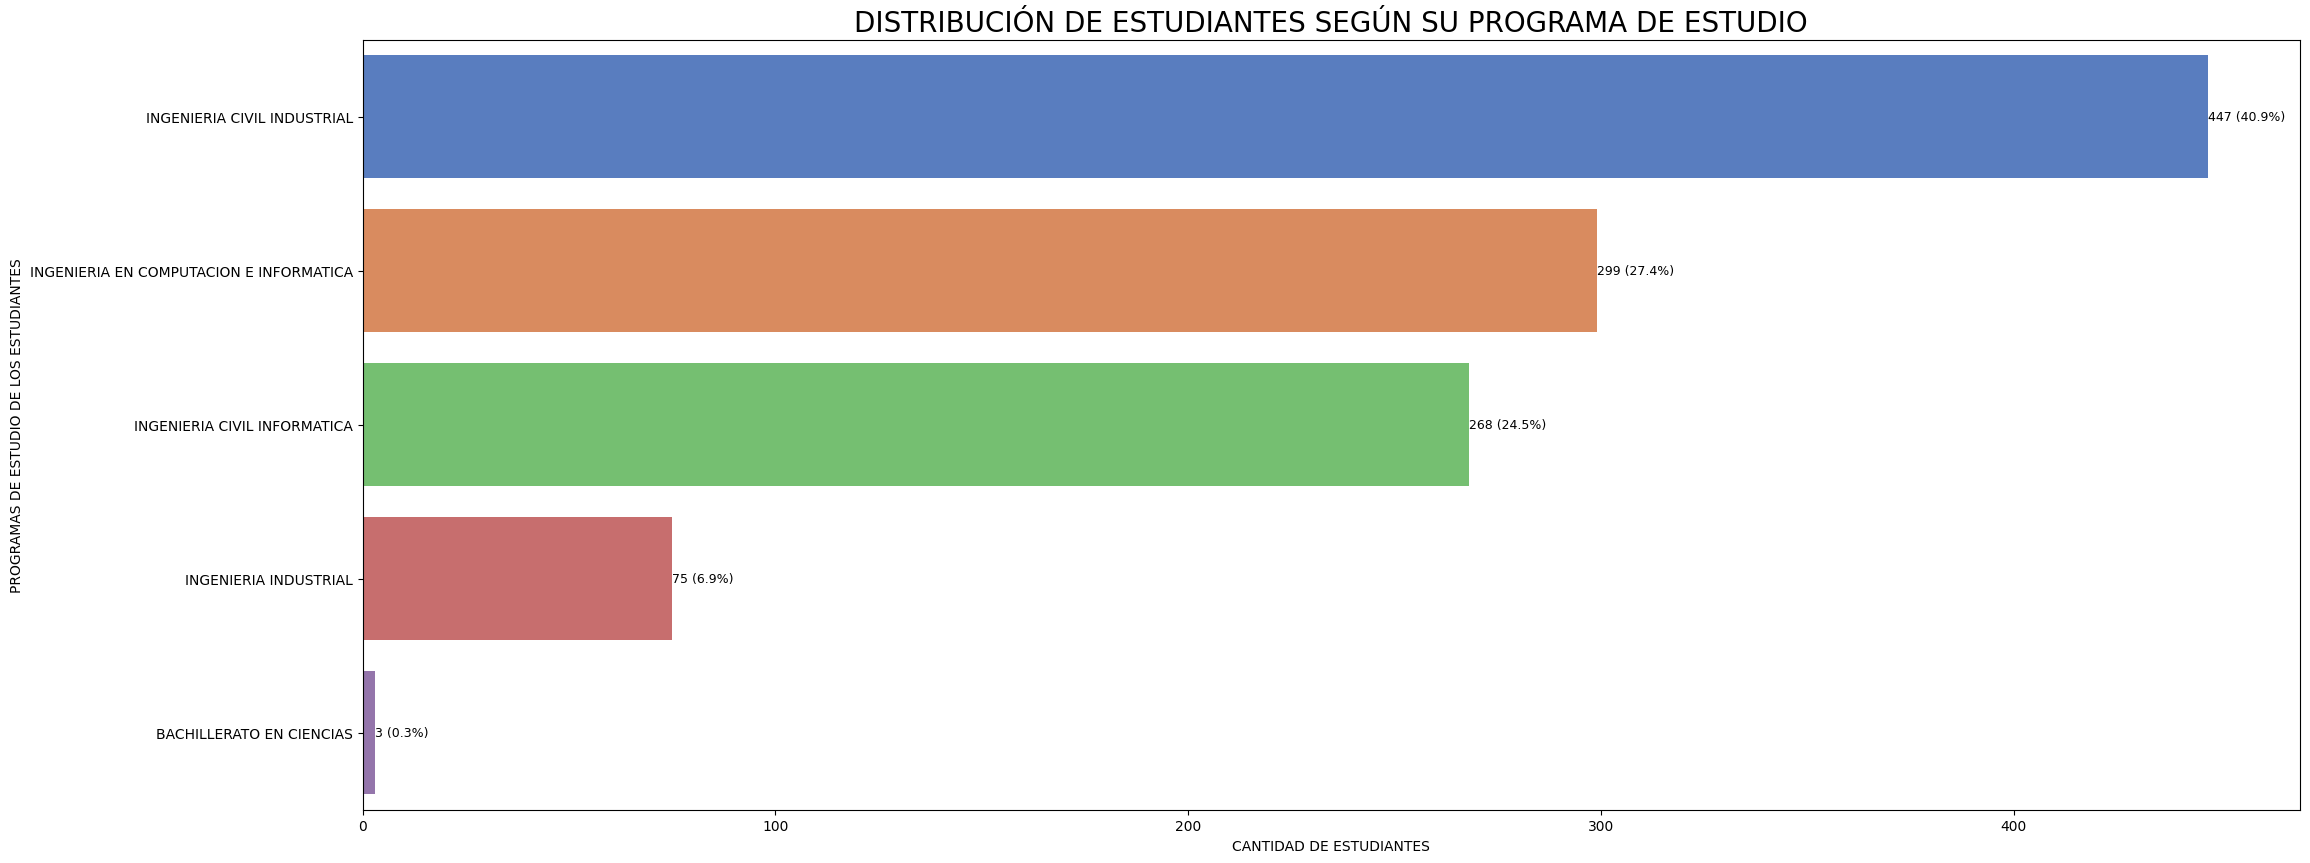

In [104]:
programas = dataset['programa'].value_counts()

fig, ax = plt.subplots(figsize=(25, 10))  
sns.barplot(x=programas.values, y=programas.index, orient='h', hue=programas.index, palette='muted', dodge=False, ax=ax)
total_estudiantes = sum(programas.values)

for container in ax.containers:
    for bar in container:
        porcentaje = (bar.get_width() / total_estudiantes) * 100
        ax.bar_label(container, labels=[f'{int(bar.get_width())} ({porcentaje:.1f}%)' for bar in container], fontsize=9)

plt.title('DISTRIBUCIÓN DE ESTUDIANTES SEGÚN SU PROGRAMA DE ESTUDIO', fontsize=20)
plt.xlabel('CANTIDAD DE ESTUDIANTES')
plt.ylabel('PROGRAMAS DE ESTUDIO DE LOS ESTUDIANTES')
plt.show()


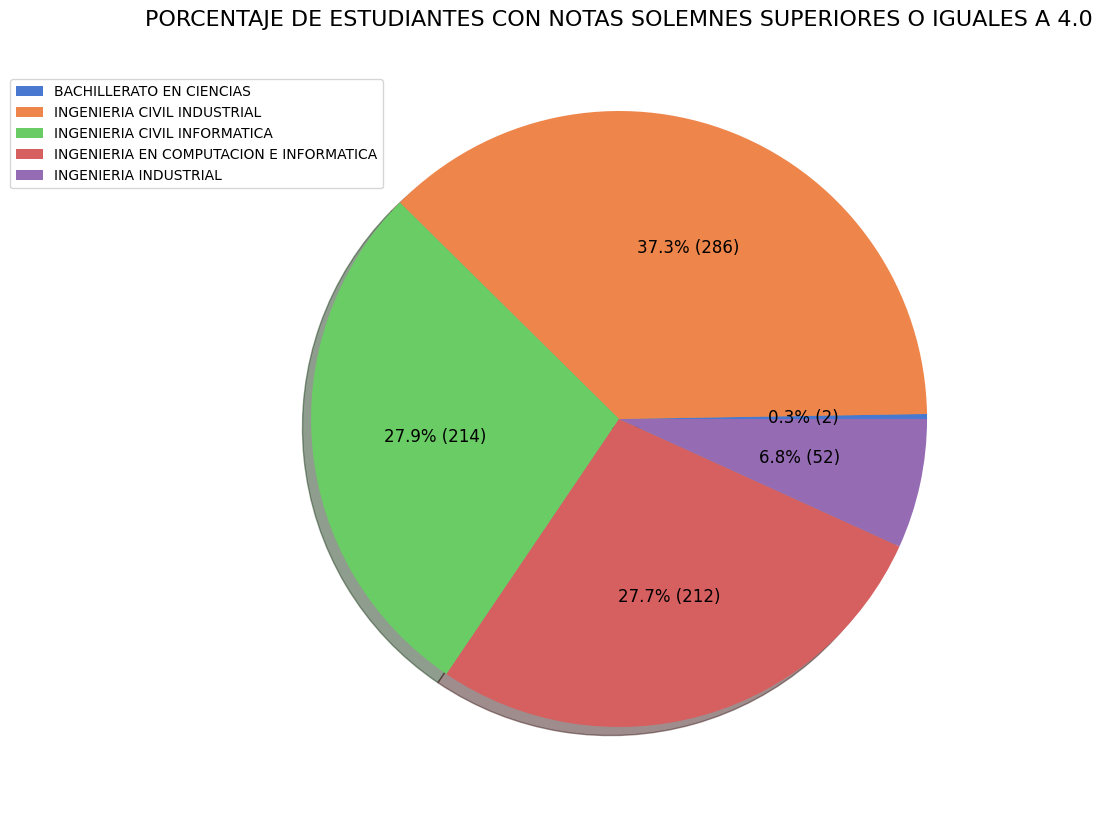

In [166]:
# AGRUPAR A ESTUDIANTES POR PROGRAMA (CARRERA)
programas = copia_dataset.groupby(copia_dataset['programa']).size()

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}% ({val})'
    return my_format

plt.figure(figsize=(10, 10))
plt.title("PORCENTAJE DE ESTUDIANTES CON NOTAS SOLEMNES SUPERIORES O IGUALES A 4.0", size=16)
plt.pie(
    programas, 
    colors=colores, 
    labeldistance=1.1, 
    textprops={'fontsize': 12}, 
    autopct=autopct_format(programas),
    shadow=True
)
plt.legend(labels=programas.index, prop={'size': 10}, loc='upper left', bbox_to_anchor=(-0.3, 0.95))
plt.show()

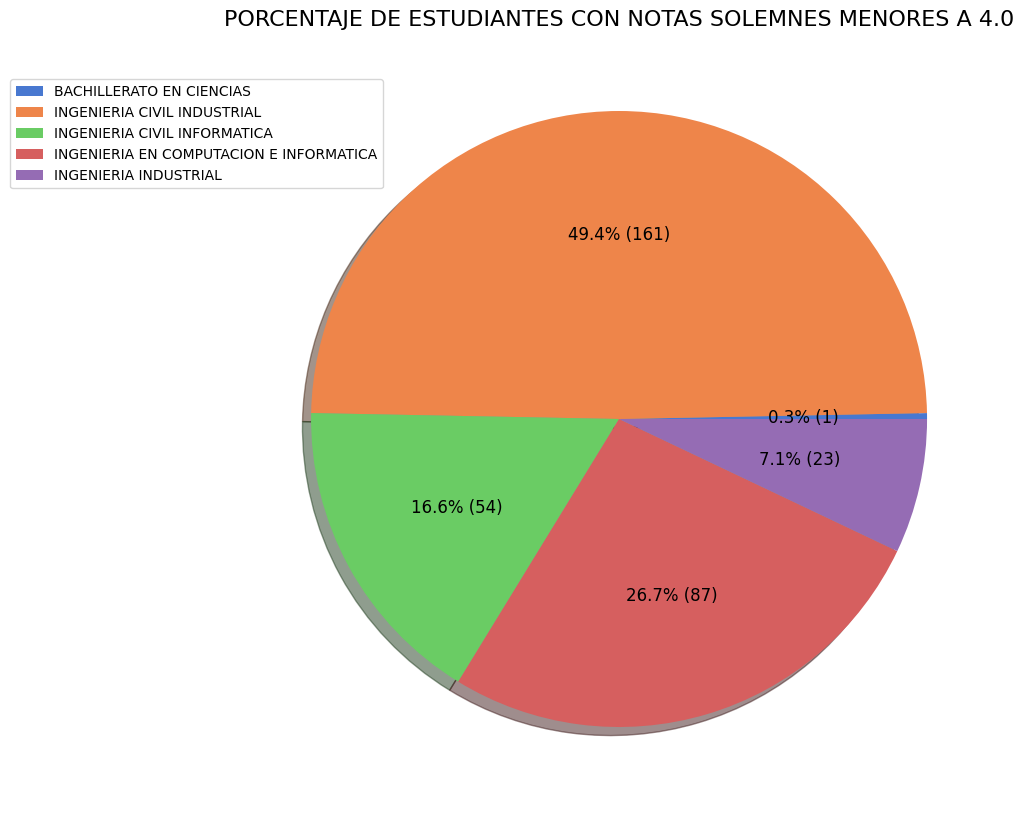

In [167]:
# AGRUPAR A ESTUDIANTES POR PROGRAMA (CARRERA)
programas = reprobados.groupby(reprobados['programa']).size()

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}% ({val})'
    return my_format

plt.figure(figsize=(10, 10))
plt.title("PORCENTAJE DE ESTUDIANTES CON NOTAS SOLEMNES MENORES A 4.0", size=16)
plt.pie(
    programas, 
    colors=colores, 
    labeldistance=1.1, 
    textprops={'fontsize': 12}, 
    autopct=autopct_format(programas),
    shadow=True
)
plt.legend(labels=programas.index, prop={'size': 10}, loc='upper left', bbox_to_anchor=(-0.3, 0.95))
plt.show()

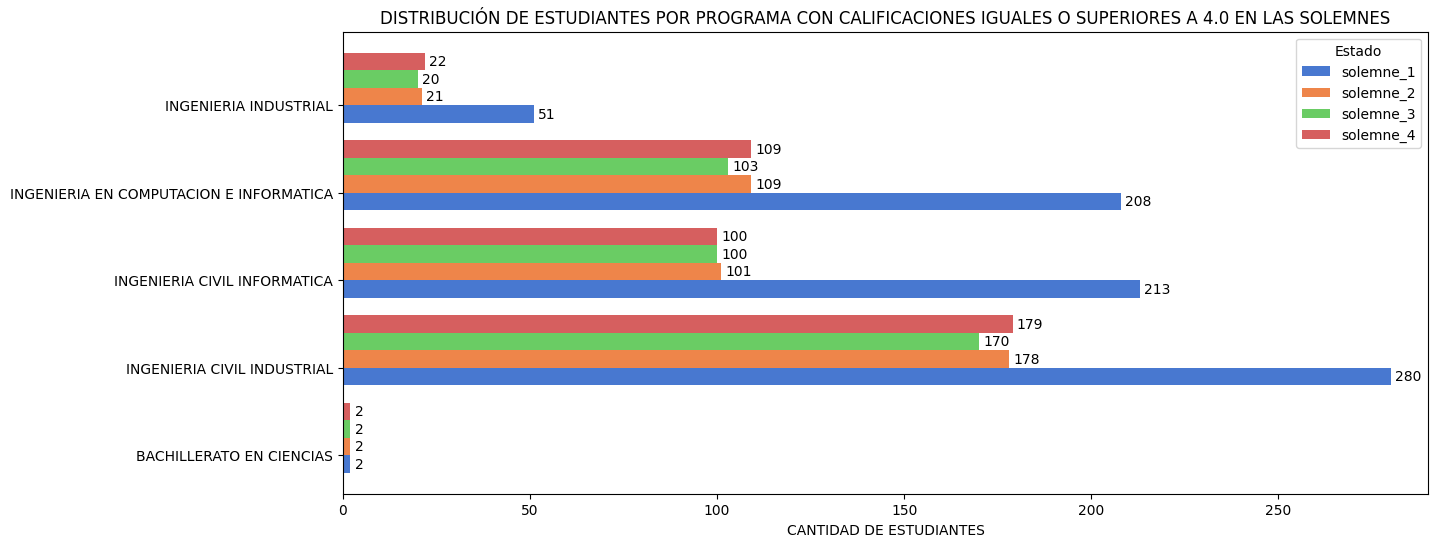

In [ ]:
estados = pd.DataFrame({
    'solemne_1': dataset[dataset['solemne_1'] >= 4.0].groupby('programa').size(),
    'solemne_2': dataset[dataset['solemne_2'] >= 4.0].groupby('programa').size(),
    'solemne_3': dataset[dataset['solemne_3'] >= 4.0].groupby('programa').size(),
    'solemne_4': dataset[dataset['solemne_4'] >= 4.0].groupby('programa').size()
}).fillna(0).astype(int)

height = 0.20
y = np.arange(len(estados))
colors = sns.color_palette("muted", n_colors=len(estados.columns))

fig, ax = plt.subplots(figsize=(14, 6))

for idx, (attribute, measurement) in enumerate(estados.items()):
    offset = height * idx
    rects = ax.barh(y + offset, measurement, height, label=attribute, color=colors[idx])
    ax.bar_label(rects, padding=3)


ax.set_title('DISTRIBUCIÓN DE ESTUDIANTES POR PROGRAMA CON CALIFICACIONES IGUALES O SUPERIORES A 4.0 EN LAS SOLEMNES')
ax.set_xlabel('CANTIDAD DE ESTUDIANTES')
ax.set_yticks(y + height / 2)
ax.set_yticklabels(estados.index)
ax.legend(title='Estado', loc='upper right')
ax.set_xlim(0, estados.max().max() + 10)
plt.show()

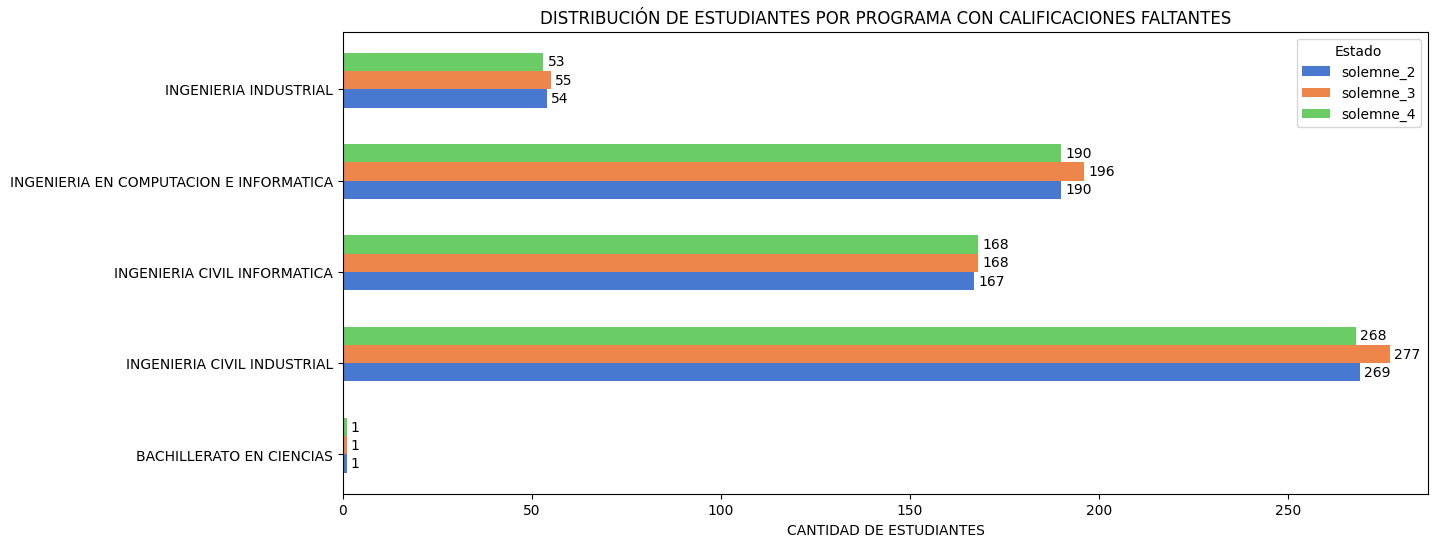

In [169]:
estados = pd.DataFrame({
    'solemne_2': dataset[dataset['solemne_2'] < 4.0].groupby('programa').size(),
    'solemne_3': dataset[dataset['solemne_3'] < 4.0].groupby('programa').size(),
    'solemne_4': dataset[dataset['solemne_4'] < 4.0].groupby('programa').size()
}).fillna(0).astype(int)

height = 0.20
y = np.arange(len(estados))
colors = sns.color_palette("muted", n_colors=len(estados.columns))

fig, ax = plt.subplots(figsize=(14, 6))

for idx, (attribute, measurement) in enumerate(estados.items()):
    offset = height * idx
    rects = ax.barh(y + offset, measurement, height, label=attribute, color=colors[idx])
    ax.bar_label(rects, padding=3)


ax.set_title('DISTRIBUCIÓN DE ESTUDIANTES POR PROGRAMA CON CALIFICACIONES FALTANTES')
ax.set_xlabel('CANTIDAD DE ESTUDIANTES')
ax.set_yticks(y + height / 2)
ax.set_yticklabels(estados.index)
ax.legend(title='Estado', loc='upper right')
ax.set_xlim(0, estados.max().max() + 10)
plt.show()

## 4. MODELADO

In [107]:
import pandas as pd

VAR_DIR_DATA_CLEANING = './data/cleaning'

ESTUDIANTES = pd.read_csv(f"{VAR_DIR_DATA_CLEANING}/estudiantes.csv", encoding="latin1")
EJERCICIOS = pd.read_csv(f"{VAR_DIR_DATA_CLEANING}/ejercicios.csv", encoding="latin1")

## 5. EVALUCIÓN

## 6. IMPLEMENTACIÓN